In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt # for plotting

In [2]:
# load dataframe from .csv file
application_record = pd.read_csv("./data/details_final.csv")
application_record.drop(['Unnamed: 0', 'aid', 'ID', 'ID.1'], inplace=True, axis=1) # drop unnecessary columns
application_record.drop(['overdue_freq', 'overdue_times'], inplace=True, axis=1) # drop unnecessary columns
application_record.drop(['final_status'], inplace=True, axis=1) # drop unnecessary columns
application_record.fillna(0, inplace=True) # fill empty cells with zero

# a quick view
print("Shape of basically processed data:", application_record.shape)
print("Example row:\n", application_record.iloc[0])

Shape of basically processed data: (36457, 18)
Example row:
 CODE_GENDER                           M
FLAG_OWN_CAR                          1
FLAG_OWN_REALTY                       1
CNT_CHILDREN                          0
AMT_INCOME_TOTAL               427500.0
NAME_INCOME_TYPE                Working
NAME_EDUCATION_TYPE    Higher education
NAME_FAMILY_STATUS       Civil marriage
NAME_HOUSING_TYPE      Rented apartment
DAYS_BIRTH                       -12005
DAYS_EMPLOYED                     -4542
FLAG_MOBIL                            1
FLAG_WORK_PHONE                       1
FLAG_PHONE                            0
FLAG_EMAIL                            0
OCCUPATION_TYPE                       0
CNT_FAM_MEMBERS                       2
final_months                        -15
Name: 0, dtype: object


Yufan's Note: The basically processed data has 19 columns, with 2 labels and 17 features.

In the next part, we will to transform those categorical features (e.g. 'NAME_INCOME_TYPE', 'OCCUPATION_TYPE') and categorical ('final_status') into numerical features with one hot encoding.

Num of bins: 60


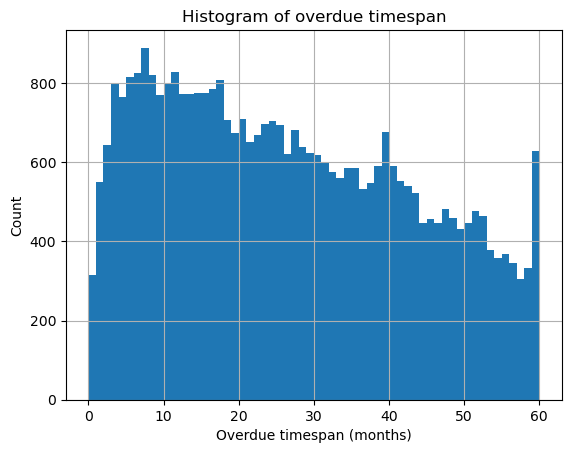

In [3]:
num_of_bins = max(-application_record['final_months'])
print("Num of bins:", num_of_bins)
plt.hist(-application_record['final_months'], bins = num_of_bins)
plt.title("Histogram of overdue timespan")
plt.ylabel("Count")
plt.xlabel("Overdue timespan (months)")
plt.grid()
plt.show()

In [4]:
## one hot encoding
# ['CODE_GENDER']
application_record['CODE_GENDER'] = application_record['CODE_GENDER'].replace(['F', 'M'], [0, 1])

# ['NAME_INCOME_TYPE']
temp = pd.get_dummies(application_record['NAME_INCOME_TYPE'])
application_record.drop('NAME_INCOME_TYPE', inplace=True, axis = 1)
for i in range(np.shape(temp)[1]):
    pos = np.shape(application_record)[1]
    application_record.insert(pos, 'INCOME_TYPE(OH).'+str(i), temp.iloc[:,i])
                        
# ['NAME_HOUSING_TYPE']
temp = pd.get_dummies(application_record['NAME_HOUSING_TYPE'])
application_record.drop('NAME_HOUSING_TYPE', inplace=True, axis = 1)
for i in range(np.shape(temp)[1]):
    pos = np.shape(application_record)[1]
    application_record.insert(pos, 'HOUSING_TYPE(OH).'+str(i), temp.iloc[:,i])
    
# ['NAME_EDUCATION_TYPE']
temp = pd.get_dummies(application_record['NAME_EDUCATION_TYPE'])
application_record.drop('NAME_EDUCATION_TYPE', inplace=True, axis = 1)
for i in range(np.shape(temp)[1]):
    pos = np.shape(application_record)[1]
    application_record.insert(pos, 'EDUCATION_TYPE(OH).'+str(i), temp.iloc[:,i])
    
# ['NAME_FAMILY_STATUS']
temp = pd.get_dummies(application_record['NAME_FAMILY_STATUS'])
application_record.drop('NAME_FAMILY_STATUS', inplace=True, axis = 1)
for i in range(np.shape(temp)[1]):
    pos = np.shape(application_record)[1]
    application_record.insert(pos, 'FAMILY_STATUS(OH).'+str(i), temp.iloc[:,i])

# ['OCCUPATION_TYPE']
temp = pd.get_dummies(application_record['OCCUPATION_TYPE'])
application_record.drop('OCCUPATION_TYPE', inplace=True, axis = 1)
for i in range(np.shape(temp)[1]):
    pos = np.shape(application_record)[1]
    application_record.insert(pos, 'OCCUPATION_TYPE(OH).'+str(i), temp.iloc[:,i])

# ['final_months'], 0 for less than 3 months, 1 for longer than 3 months.
threshold = 12
# application_record.insert(np.shape(application_record)[1], 'LABEL_MONTHS', application_record['final_months'].clip(-threshold-1)//-threshold)
temp = pd.get_dummies(application_record['final_months'].clip(-threshold-1)//-threshold)
application_record.drop('final_months', inplace=True, axis=1)
for i in range(np.shape(temp)[1]):
    pos = np.shape(application_record)[1]
    application_record.insert(pos, 'LABEL_MONTHS(OH).'+str(i), temp.iloc[:,i])
    
# a quick view
print("Shape of application record:", application_record.shape)
print("Example row:\n", application_record.iloc[0])

Shape of application record: (36457, 54)
Example row:
 CODE_GENDER                    1.0
FLAG_OWN_CAR                   1.0
FLAG_OWN_REALTY                1.0
CNT_CHILDREN                   0.0
AMT_INCOME_TOTAL          427500.0
DAYS_BIRTH                -12005.0
DAYS_EMPLOYED              -4542.0
FLAG_MOBIL                     1.0
FLAG_WORK_PHONE                1.0
FLAG_PHONE                     0.0
FLAG_EMAIL                     0.0
CNT_FAM_MEMBERS                2.0
INCOME_TYPE(OH).0              0.0
INCOME_TYPE(OH).1              0.0
INCOME_TYPE(OH).2              0.0
INCOME_TYPE(OH).3              0.0
INCOME_TYPE(OH).4              1.0
HOUSING_TYPE(OH).0             0.0
HOUSING_TYPE(OH).1             0.0
HOUSING_TYPE(OH).2             0.0
HOUSING_TYPE(OH).3             0.0
HOUSING_TYPE(OH).4             1.0
HOUSING_TYPE(OH).5             0.0
EDUCATION_TYPE(OH).0           0.0
EDUCATION_TYPE(OH).1           1.0
EDUCATION_TYPE(OH).2           0.0
EDUCATION_TYPE(OH).3           0.0


In [5]:
# get dataset ready for nerual network
train, test = train_test_split(application_record, test_size=0.1) # split dataset (result is numpy.ndarray)

# further split to train/ test data/ label
# as well as convert to numpy array
dim = np.shape(application_record)[1]
train_data = train.iloc[:,0:(dim-2)]
train_label_months = train.iloc[:,dim-2:dim]
test_data = test.iloc[:,0:dim-2]
test_label_months = test.iloc[:,dim-2:dim]

print("Size of train_data: {}".format(np.shape(train_data)))
print("Size of train_label_months: {}".format(np.shape(train_label_months)))
print("Size of test_data: {}".format(np.shape(test_data)))
print("Size of test_label_months: {}".format(np.shape(test_label_months)))

Size of train_data: (32811, 52)
Size of train_label_months: (32811, 2)
Size of test_data: (3646, 52)
Size of test_label_months: (3646, 2)


In [6]:
# build model predicting overdue status
reg = 1e-8
input_length = np.shape(test_data)[1]
output_length = np.shape(test_label_months)[1]
model_status = tf.keras.Sequential([
    layers.BatchNormalization(input_dim = input_length),
    layers.Dense(1*input_length, activation='relu', kernel_regularizer=l2(reg), activity_regularizer=l2(reg)),
    layers.BatchNormalization(),
    layers.Dense(4*input_length, activation='relu', kernel_regularizer=l2(reg), activity_regularizer=l2(reg)),
    layers.BatchNormalization(),
    layers.Dense(2*input_length, activation='relu', kernel_regularizer=l2(reg), activity_regularizer=l2(reg)),
    layers.BatchNormalization(),
    layers.Dense(1*input_length, activation='relu'),
    layers.Dense(output_length, activation='softmax')
])

# model compile and fit
model_status.summary()
opt = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    amsgrad=True,
    name="Adam",
    clipvalue = 0.1
)
model_status.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history_status = model_status.fit(train_data, train_label_months, batch_size=64, epochs=10000, validation_data=(test_data, test_label_months))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 52)                208       
_________________________________________________________________
dense (Dense)                (None, 52)                2756      
_________________________________________________________________
batch_normalization_1 (Batch (None, 52)                208       
_________________________________________________________________
dense_1 (Dense)              (None, 208)               11024     
_________________________________________________________________
batch_normalization_2 (Batch (None, 208)               832       
_________________________________________________________________
dense_2 (Dense)              (None, 104)               21736     
_________________________________________________________________
batch_normalization_3 (Batch (None, 104)               4

513/513 [==============================] - 6s 11ms/step - loss: 0.4887 - accuracy: 0.7749 - val_loss: 0.5762 - val_accuracy: 0.7416
Epoch 47/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4885 - accuracy: 0.7747 - val_loss: 0.5823 - val_accuracy: 0.7383
Epoch 48/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4898 - accuracy: 0.7760 - val_loss: 0.5767 - val_accuracy: 0.7466
Epoch 49/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.4875 - accuracy: 0.7745 - val_loss: 0.5861 - val_accuracy: 0.7392
Epoch 50/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4897 - accuracy: 0.7722 - val_loss: 0.5822 - val_accuracy: 0.7397
Epoch 51/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4870 - accuracy: 0.7750 - val_loss: 0.5867 - val_accuracy: 0.7433
Epoch 52/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4854 - accuracy: 0.7746 - val_loss: 0.5897 - val_acc

Epoch 102/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4675 - accuracy: 0.7832 - val_loss: 0.6096 - val_accuracy: 0.7389
Epoch 103/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4671 - accuracy: 0.7827 - val_loss: 0.6124 - val_accuracy: 0.7403
Epoch 104/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4674 - accuracy: 0.7812 - val_loss: 0.6091 - val_accuracy: 0.7397
Epoch 105/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4660 - accuracy: 0.7846 - val_loss: 0.6103 - val_accuracy: 0.7378
Epoch 106/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4662 - accuracy: 0.7835 - val_loss: 0.6081 - val_accuracy: 0.7400
Epoch 107/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4659 - accuracy: 0.7832 - val_loss: 0.6034 - val_accuracy: 0.7392
Epoch 108/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4663 - accuracy: 0.7832 - val_

513/513 [==============================] - 6s 11ms/step - loss: 0.4541 - accuracy: 0.7890 - val_loss: 0.6302 - val_accuracy: 0.7392
Epoch 158/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4546 - accuracy: 0.7879 - val_loss: 0.6307 - val_accuracy: 0.7397
Epoch 159/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4564 - accuracy: 0.7867 - val_loss: 0.6322 - val_accuracy: 0.7367
Epoch 160/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4552 - accuracy: 0.7883 - val_loss: 0.6352 - val_accuracy: 0.7397
Epoch 161/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4535 - accuracy: 0.7871 - val_loss: 0.6362 - val_accuracy: 0.7405
Epoch 162/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4551 - accuracy: 0.7867 - val_loss: 0.6414 - val_accuracy: 0.7378
Epoch 163/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4550 - accuracy: 0.7872 - val_loss: 0.6274 - v

513/513 [==============================] - 6s 12ms/step - loss: 0.4487 - accuracy: 0.7875 - val_loss: 0.6409 - val_accuracy: 0.7378
Epoch 213/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4480 - accuracy: 0.7901 - val_loss: 0.6454 - val_accuracy: 0.7400
Epoch 214/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4464 - accuracy: 0.7907 - val_loss: 0.6543 - val_accuracy: 0.7389
Epoch 215/10000
513/513 [==============================] - 7s 13ms/step - loss: 0.4476 - accuracy: 0.7902 - val_loss: 0.6456 - val_accuracy: 0.7386
Epoch 216/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4481 - accuracy: 0.7899 - val_loss: 0.6520 - val_accuracy: 0.7340
Epoch 217/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4472 - accuracy: 0.7902 - val_loss: 0.6513 - val_accuracy: 0.7372
Epoch 218/10000
513/513 [==============================] - 6s 13ms/step - loss: 0.4476 - accuracy: 0.7899 - val_loss: 0.6440 - v

513/513 [==============================] - 7s 13ms/step - loss: 0.4417 - accuracy: 0.7919 - val_loss: 0.6737 - val_accuracy: 0.7318
Epoch 268/10000
513/513 [==============================] - 7s 14ms/step - loss: 0.4408 - accuracy: 0.7918 - val_loss: 0.6759 - val_accuracy: 0.7345
Epoch 269/10000
513/513 [==============================] - 7s 13ms/step - loss: 0.4418 - accuracy: 0.7915 - val_loss: 0.6663 - val_accuracy: 0.7375
Epoch 270/10000
513/513 [==============================] - 7s 13ms/step - loss: 0.4413 - accuracy: 0.7940 - val_loss: 0.6666 - val_accuracy: 0.7378
Epoch 271/10000
513/513 [==============================] - 7s 13ms/step - loss: 0.4415 - accuracy: 0.7931 - val_loss: 0.6714 - val_accuracy: 0.7340
Epoch 272/10000
513/513 [==============================] - 7s 13ms/step - loss: 0.4410 - accuracy: 0.7919 - val_loss: 0.6683 - val_accuracy: 0.7345
Epoch 273/10000
513/513 [==============================] - 7s 13ms/step - loss: 0.4415 - accuracy: 0.7935 - val_loss: 0.6700 - v

513/513 [==============================] - 6s 13ms/step - loss: 0.4387 - accuracy: 0.7916 - val_loss: 0.6769 - val_accuracy: 0.7307
Epoch 323/10000
513/513 [==============================] - 7s 13ms/step - loss: 0.4370 - accuracy: 0.7936 - val_loss: 0.6837 - val_accuracy: 0.7301
Epoch 324/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4365 - accuracy: 0.7939 - val_loss: 0.6887 - val_accuracy: 0.7309
Epoch 325/10000
513/513 [==============================] - 7s 13ms/step - loss: 0.4377 - accuracy: 0.7940 - val_loss: 0.6764 - val_accuracy: 0.7400
Epoch 326/10000
513/513 [==============================] - 7s 13ms/step - loss: 0.4396 - accuracy: 0.7934 - val_loss: 0.6826 - val_accuracy: 0.7375
Epoch 327/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4382 - accuracy: 0.7949 - val_loss: 0.6803 - val_accuracy: 0.7372
Epoch 328/10000
513/513 [==============================] - 7s 13ms/step - loss: 0.4407 - accuracy: 0.7940 - val_loss: 0.6893 - v

513/513 [==============================] - 6s 12ms/step - loss: 0.4345 - accuracy: 0.7950 - val_loss: 0.7055 - val_accuracy: 0.7351
Epoch 378/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4333 - accuracy: 0.7937 - val_loss: 0.7083 - val_accuracy: 0.7408
Epoch 379/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4355 - accuracy: 0.7939 - val_loss: 0.6967 - val_accuracy: 0.7411
Epoch 380/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4354 - accuracy: 0.7942 - val_loss: 0.7030 - val_accuracy: 0.7386
Epoch 381/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4346 - accuracy: 0.7949 - val_loss: 0.6973 - val_accuracy: 0.7400
Epoch 382/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4348 - accuracy: 0.7955 - val_loss: 0.6989 - val_accuracy: 0.7370
Epoch 383/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4353 - accuracy: 0.7944 - val_loss: 0.6966 - v

513/513 [==============================] - 6s 12ms/step - loss: 0.4319 - accuracy: 0.7953 - val_loss: 0.7114 - val_accuracy: 0.7367
Epoch 433/10000
513/513 [==============================] - 6s 13ms/step - loss: 0.4305 - accuracy: 0.7970 - val_loss: 0.7127 - val_accuracy: 0.7323
Epoch 434/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4321 - accuracy: 0.7954 - val_loss: 0.7119 - val_accuracy: 0.7351
Epoch 435/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4309 - accuracy: 0.7959 - val_loss: 0.6948 - val_accuracy: 0.7386
Epoch 436/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4319 - accuracy: 0.7952 - val_loss: 0.6965 - val_accuracy: 0.7364
Epoch 437/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4316 - accuracy: 0.7967 - val_loss: 0.7061 - val_accuracy: 0.7351
Epoch 438/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4324 - accuracy: 0.7948 - val_loss: 0.7133 - v

513/513 [==============================] - 7s 13ms/step - loss: 0.4281 - accuracy: 0.7976 - val_loss: 0.7290 - val_accuracy: 0.7392
Epoch 488/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4314 - accuracy: 0.7963 - val_loss: 0.7165 - val_accuracy: 0.7383
Epoch 489/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4290 - accuracy: 0.7959 - val_loss: 0.7266 - val_accuracy: 0.7370
Epoch 490/10000
513/513 [==============================] - 6s 13ms/step - loss: 0.4305 - accuracy: 0.7953 - val_loss: 0.7358 - val_accuracy: 0.7293
Epoch 491/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4290 - accuracy: 0.7966 - val_loss: 0.7185 - val_accuracy: 0.7375
Epoch 492/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4297 - accuracy: 0.7961 - val_loss: 0.7270 - val_accuracy: 0.7312
Epoch 493/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4291 - accuracy: 0.7981 - val_loss: 0.7167 - v

513/513 [==============================] - 6s 12ms/step - loss: 0.4283 - accuracy: 0.7977 - val_loss: 0.7387 - val_accuracy: 0.7397
Epoch 543/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4265 - accuracy: 0.7976 - val_loss: 0.7426 - val_accuracy: 0.7323
Epoch 544/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4272 - accuracy: 0.7969 - val_loss: 0.7394 - val_accuracy: 0.7323
Epoch 545/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4279 - accuracy: 0.7971 - val_loss: 0.7269 - val_accuracy: 0.7381
Epoch 546/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4260 - accuracy: 0.7993 - val_loss: 0.7499 - val_accuracy: 0.7304
Epoch 547/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4278 - accuracy: 0.7961 - val_loss: 0.7505 - val_accuracy: 0.7361
Epoch 548/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4282 - accuracy: 0.7974 - val_loss: 0.7424 - v

513/513 [==============================] - 6s 12ms/step - loss: 0.4248 - accuracy: 0.7971 - val_loss: 0.7370 - val_accuracy: 0.7353
Epoch 598/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4261 - accuracy: 0.7977 - val_loss: 0.7454 - val_accuracy: 0.7381
Epoch 599/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4254 - accuracy: 0.7982 - val_loss: 0.7280 - val_accuracy: 0.7367
Epoch 600/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4263 - accuracy: 0.7978 - val_loss: 0.7294 - val_accuracy: 0.7414
Epoch 601/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4229 - accuracy: 0.7998 - val_loss: 0.7723 - val_accuracy: 0.7356
Epoch 602/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4241 - accuracy: 0.7987 - val_loss: 0.7449 - val_accuracy: 0.7370
Epoch 603/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4267 - accuracy: 0.7969 - val_loss: 0.7480 - v

513/513 [==============================] - 6s 11ms/step - loss: 0.4221 - accuracy: 0.8009 - val_loss: 0.7486 - val_accuracy: 0.7392
Epoch 653/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4235 - accuracy: 0.7978 - val_loss: 0.7491 - val_accuracy: 0.7430
Epoch 654/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4235 - accuracy: 0.7991 - val_loss: 0.7464 - val_accuracy: 0.7408
Epoch 655/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4250 - accuracy: 0.7963 - val_loss: 0.7537 - val_accuracy: 0.7348
Epoch 656/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4242 - accuracy: 0.7982 - val_loss: 0.7516 - val_accuracy: 0.7400
Epoch 657/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4244 - accuracy: 0.7986 - val_loss: 0.7431 - val_accuracy: 0.7400
Epoch 658/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4242 - accuracy: 0.7986 - val_loss: 0.7511 - v

513/513 [==============================] - 6s 12ms/step - loss: 0.4215 - accuracy: 0.7996 - val_loss: 0.7469 - val_accuracy: 0.7342
Epoch 708/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4228 - accuracy: 0.8003 - val_loss: 0.7642 - val_accuracy: 0.7340
Epoch 709/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4232 - accuracy: 0.7995 - val_loss: 0.7505 - val_accuracy: 0.7394
Epoch 710/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4223 - accuracy: 0.7999 - val_loss: 0.7720 - val_accuracy: 0.7359
Epoch 711/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4242 - accuracy: 0.7964 - val_loss: 0.7603 - val_accuracy: 0.7386
Epoch 712/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4215 - accuracy: 0.7996 - val_loss: 0.7799 - val_accuracy: 0.7353
Epoch 713/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4207 - accuracy: 0.8000 - val_loss: 0.7682 - v

513/513 [==============================] - 6s 12ms/step - loss: 0.4220 - accuracy: 0.7987 - val_loss: 0.7643 - val_accuracy: 0.7392
Epoch 763/10000
513/513 [==============================] - 7s 13ms/step - loss: 0.4213 - accuracy: 0.7986 - val_loss: 0.7850 - val_accuracy: 0.7361
Epoch 764/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.4207 - accuracy: 0.7969 - val_loss: 0.7694 - val_accuracy: 0.7389
Epoch 765/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4219 - accuracy: 0.8001 - val_loss: 0.7654 - val_accuracy: 0.7334
Epoch 766/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4223 - accuracy: 0.7989 - val_loss: 0.7556 - val_accuracy: 0.7372
Epoch 767/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4209 - accuracy: 0.7994 - val_loss: 0.7709 - val_accuracy: 0.7364
Epoch 768/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4216 - accuracy: 0.7989 - val_loss: 0.7847 - v

513/513 [==============================] - 5s 10ms/step - loss: 0.4215 - accuracy: 0.7984 - val_loss: 0.7805 - val_accuracy: 0.7386
Epoch 818/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4209 - accuracy: 0.8001 - val_loss: 0.7798 - val_accuracy: 0.7345
Epoch 819/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4210 - accuracy: 0.7990 - val_loss: 0.7769 - val_accuracy: 0.7340
Epoch 820/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4206 - accuracy: 0.7990 - val_loss: 0.7892 - val_accuracy: 0.7348
Epoch 821/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4201 - accuracy: 0.7991 - val_loss: 0.7689 - val_accuracy: 0.7329
Epoch 822/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4183 - accuracy: 0.7993 - val_loss: 0.7758 - val_accuracy: 0.7372
Epoch 823/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4197 - accuracy: 0.7980 - val_loss: 0.7942 - v

513/513 [==============================] - 5s 11ms/step - loss: 0.4191 - accuracy: 0.8004 - val_loss: 0.7841 - val_accuracy: 0.7392
Epoch 873/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4181 - accuracy: 0.8007 - val_loss: 0.7935 - val_accuracy: 0.7312
Epoch 874/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4197 - accuracy: 0.7991 - val_loss: 0.8057 - val_accuracy: 0.7340
Epoch 875/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4194 - accuracy: 0.8009 - val_loss: 0.7980 - val_accuracy: 0.7331
Epoch 876/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4194 - accuracy: 0.7995 - val_loss: 0.7923 - val_accuracy: 0.7381
Epoch 877/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4202 - accuracy: 0.7976 - val_loss: 0.8026 - val_accuracy: 0.7372
Epoch 878/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4185 - accuracy: 0.8013 - val_loss: 0.8145 - v

513/513 [==============================] - 6s 12ms/step - loss: 0.4174 - accuracy: 0.8005 - val_loss: 0.7943 - val_accuracy: 0.7318
Epoch 928/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4189 - accuracy: 0.7990 - val_loss: 0.8103 - val_accuracy: 0.7386
Epoch 929/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4186 - accuracy: 0.7992 - val_loss: 0.8288 - val_accuracy: 0.7342
Epoch 930/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4180 - accuracy: 0.8012 - val_loss: 0.8197 - val_accuracy: 0.7329
Epoch 931/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4176 - accuracy: 0.8000 - val_loss: 0.7996 - val_accuracy: 0.7334
Epoch 932/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4199 - accuracy: 0.7983 - val_loss: 0.7755 - val_accuracy: 0.7405
Epoch 933/10000
513/513 [==============================] - 7s 13ms/step - loss: 0.4166 - accuracy: 0.7989 - val_loss: 0.8168 - v

513/513 [==============================] - 6s 12ms/step - loss: 0.4171 - accuracy: 0.7999 - val_loss: 0.8039 - val_accuracy: 0.7326
Epoch 983/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4182 - accuracy: 0.8013 - val_loss: 0.8100 - val_accuracy: 0.7323
Epoch 984/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4172 - accuracy: 0.8009 - val_loss: 0.8062 - val_accuracy: 0.7356
Epoch 985/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4178 - accuracy: 0.8002 - val_loss: 0.8004 - val_accuracy: 0.7312
Epoch 986/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4185 - accuracy: 0.7994 - val_loss: 0.7895 - val_accuracy: 0.7331
Epoch 987/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4166 - accuracy: 0.7992 - val_loss: 0.8011 - val_accuracy: 0.7342
Epoch 988/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4163 - accuracy: 0.8014 - val_loss: 0.8090 - v

513/513 [==============================] - 5s 10ms/step - loss: 0.4180 - accuracy: 0.7992 - val_loss: 0.8075 - val_accuracy: 0.7372
Epoch 1038/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.4170 - accuracy: 0.8007 - val_loss: 0.8134 - val_accuracy: 0.7381
Epoch 1039/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4182 - accuracy: 0.7989 - val_loss: 0.8125 - val_accuracy: 0.7320
Epoch 1040/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4190 - accuracy: 0.7983 - val_loss: 0.7839 - val_accuracy: 0.7356
Epoch 1041/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4170 - accuracy: 0.8010 - val_loss: 0.7937 - val_accuracy: 0.7359
Epoch 1042/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4167 - accuracy: 0.7997 - val_loss: 0.7917 - val_accuracy: 0.7405
Epoch 1043/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4170 - accuracy: 0.8013 - val_loss: 0.81

513/513 [==============================] - 5s 10ms/step - loss: 0.4179 - accuracy: 0.8012 - val_loss: 0.7940 - val_accuracy: 0.7392
Epoch 1093/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.4164 - accuracy: 0.8006 - val_loss: 0.7848 - val_accuracy: 0.7381
Epoch 1094/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4171 - accuracy: 0.8009 - val_loss: 0.8356 - val_accuracy: 0.7334
Epoch 1095/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4177 - accuracy: 0.8004 - val_loss: 0.8038 - val_accuracy: 0.7425
Epoch 1096/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.4139 - accuracy: 0.8026 - val_loss: 0.8039 - val_accuracy: 0.7348
Epoch 1097/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4157 - accuracy: 0.8023 - val_loss: 0.8085 - val_accuracy: 0.7359
Epoch 1098/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4155 - accuracy: 0.8011 - val_loss: 0.81

513/513 [==============================] - 6s 11ms/step - loss: 0.4142 - accuracy: 0.8010 - val_loss: 0.8216 - val_accuracy: 0.7367
Epoch 1148/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4162 - accuracy: 0.8024 - val_loss: 0.8393 - val_accuracy: 0.7389
Epoch 1149/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4155 - accuracy: 0.8018 - val_loss: 0.8294 - val_accuracy: 0.7403
Epoch 1150/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4165 - accuracy: 0.8013 - val_loss: 0.8067 - val_accuracy: 0.7408
Epoch 1151/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4144 - accuracy: 0.8018 - val_loss: 0.8412 - val_accuracy: 0.7414
Epoch 1152/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4156 - accuracy: 0.8011 - val_loss: 0.8217 - val_accuracy: 0.7375
Epoch 1153/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4147 - accuracy: 0.8017 - val_loss: 0.83

513/513 [==============================] - 6s 12ms/step - loss: 0.4143 - accuracy: 0.8023 - val_loss: 0.8287 - val_accuracy: 0.7309
Epoch 1203/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4165 - accuracy: 0.8011 - val_loss: 0.8028 - val_accuracy: 0.7425
Epoch 1204/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4144 - accuracy: 0.8029 - val_loss: 0.8246 - val_accuracy: 0.7361
Epoch 1205/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4163 - accuracy: 0.8018 - val_loss: 0.8155 - val_accuracy: 0.7364
Epoch 1206/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4147 - accuracy: 0.8030 - val_loss: 0.8324 - val_accuracy: 0.7329
Epoch 1207/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4159 - accuracy: 0.8020 - val_loss: 0.8285 - val_accuracy: 0.7326
Epoch 1208/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4162 - accuracy: 0.8000 - val_loss: 0.82

513/513 [==============================] - 6s 11ms/step - loss: 0.4137 - accuracy: 0.8000 - val_loss: 0.8610 - val_accuracy: 0.7318
Epoch 1258/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4134 - accuracy: 0.8014 - val_loss: 0.8490 - val_accuracy: 0.7389
Epoch 1259/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.4126 - accuracy: 0.8026 - val_loss: 0.8411 - val_accuracy: 0.7375
Epoch 1260/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.4133 - accuracy: 0.8024 - val_loss: 0.8551 - val_accuracy: 0.7408
Epoch 1261/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4155 - accuracy: 0.8008 - val_loss: 0.8246 - val_accuracy: 0.7372
Epoch 1262/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4130 - accuracy: 0.8026 - val_loss: 0.8318 - val_accuracy: 0.7389
Epoch 1263/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4132 - accuracy: 0.8034 - val_loss: 0.84

513/513 [==============================] - 6s 11ms/step - loss: 0.4139 - accuracy: 0.7999 - val_loss: 0.8565 - val_accuracy: 0.7364
Epoch 1313/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4125 - accuracy: 0.8026 - val_loss: 0.8618 - val_accuracy: 0.7356
Epoch 1314/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4143 - accuracy: 0.8017 - val_loss: 0.8525 - val_accuracy: 0.7334
Epoch 1315/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4132 - accuracy: 0.8030 - val_loss: 0.8610 - val_accuracy: 0.7375
Epoch 1316/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4124 - accuracy: 0.8019 - val_loss: 0.8721 - val_accuracy: 0.7392
Epoch 1317/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4131 - accuracy: 0.8021 - val_loss: 0.8385 - val_accuracy: 0.7430
Epoch 1318/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4131 - accuracy: 0.8007 - val_loss: 0.84

513/513 [==============================] - 6s 11ms/step - loss: 0.4134 - accuracy: 0.8020 - val_loss: 0.8659 - val_accuracy: 0.7405
Epoch 1368/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4131 - accuracy: 0.8027 - val_loss: 0.8463 - val_accuracy: 0.7359
Epoch 1369/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.4133 - accuracy: 0.8015 - val_loss: 0.8708 - val_accuracy: 0.7367
Epoch 1370/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4140 - accuracy: 0.8032 - val_loss: 0.8644 - val_accuracy: 0.7394
Epoch 1371/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4132 - accuracy: 0.8017 - val_loss: 0.8343 - val_accuracy: 0.7375
Epoch 1372/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4121 - accuracy: 0.8028 - val_loss: 0.8430 - val_accuracy: 0.7372
Epoch 1373/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4130 - accuracy: 0.8024 - val_loss: 0.84

513/513 [==============================] - 6s 11ms/step - loss: 0.4118 - accuracy: 0.8022 - val_loss: 0.8449 - val_accuracy: 0.7329
Epoch 1423/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.4122 - accuracy: 0.8023 - val_loss: 0.8518 - val_accuracy: 0.7340
Epoch 1424/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4113 - accuracy: 0.8030 - val_loss: 0.8535 - val_accuracy: 0.7397
Epoch 1425/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4141 - accuracy: 0.8021 - val_loss: 0.8518 - val_accuracy: 0.7351
Epoch 1426/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4125 - accuracy: 0.8010 - val_loss: 0.8675 - val_accuracy: 0.7348
Epoch 1427/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4112 - accuracy: 0.8025 - val_loss: 0.8748 - val_accuracy: 0.7348
Epoch 1428/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4133 - accuracy: 0.8018 - val_loss: 0.85

513/513 [==============================] - 6s 11ms/step - loss: 0.4111 - accuracy: 0.8027 - val_loss: 0.8827 - val_accuracy: 0.7370
Epoch 1478/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.4136 - accuracy: 0.8016 - val_loss: 0.8708 - val_accuracy: 0.7416
Epoch 1479/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4116 - accuracy: 0.8029 - val_loss: 0.8698 - val_accuracy: 0.7383
Epoch 1480/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4110 - accuracy: 0.8029 - val_loss: 0.8618 - val_accuracy: 0.7372
Epoch 1481/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4118 - accuracy: 0.8027 - val_loss: 0.8521 - val_accuracy: 0.7359
Epoch 1482/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4107 - accuracy: 0.8038 - val_loss: 0.8866 - val_accuracy: 0.7405
Epoch 1483/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4109 - accuracy: 0.8042 - val_loss: 0.86

513/513 [==============================] - 6s 12ms/step - loss: 0.4119 - accuracy: 0.8008 - val_loss: 0.8624 - val_accuracy: 0.7361
Epoch 1533/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4112 - accuracy: 0.8013 - val_loss: 0.8811 - val_accuracy: 0.7353
Epoch 1534/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4109 - accuracy: 0.8027 - val_loss: 0.8801 - val_accuracy: 0.7359
Epoch 1535/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4105 - accuracy: 0.8028 - val_loss: 0.9007 - val_accuracy: 0.7370
Epoch 1536/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4122 - accuracy: 0.8040 - val_loss: 0.8772 - val_accuracy: 0.7318
Epoch 1537/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.4111 - accuracy: 0.8028 - val_loss: 0.8871 - val_accuracy: 0.7345
Epoch 1538/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4107 - accuracy: 0.8025 - val_loss: 0.88

513/513 [==============================] - 6s 12ms/step - loss: 0.4115 - accuracy: 0.8035 - val_loss: 0.8677 - val_accuracy: 0.7378
Epoch 1588/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4111 - accuracy: 0.8014 - val_loss: 0.8794 - val_accuracy: 0.7359
Epoch 1589/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4117 - accuracy: 0.8018 - val_loss: 0.8797 - val_accuracy: 0.7353
Epoch 1590/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4111 - accuracy: 0.8009 - val_loss: 0.8765 - val_accuracy: 0.7329
Epoch 1591/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4103 - accuracy: 0.8018 - val_loss: 0.8410 - val_accuracy: 0.7348
Epoch 1592/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4098 - accuracy: 0.8019 - val_loss: 0.8827 - val_accuracy: 0.7353
Epoch 1593/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4114 - accuracy: 0.8028 - val_loss: 0.86

513/513 [==============================] - 6s 12ms/step - loss: 0.4096 - accuracy: 0.8042 - val_loss: 0.8764 - val_accuracy: 0.7419
Epoch 1643/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4108 - accuracy: 0.8018 - val_loss: 0.8540 - val_accuracy: 0.7378
Epoch 1644/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4118 - accuracy: 0.8048 - val_loss: 0.8826 - val_accuracy: 0.7400
Epoch 1645/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4121 - accuracy: 0.8030 - val_loss: 0.8872 - val_accuracy: 0.7364
Epoch 1646/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4095 - accuracy: 0.8043 - val_loss: 0.8634 - val_accuracy: 0.7312
Epoch 1647/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4117 - accuracy: 0.8022 - val_loss: 0.8823 - val_accuracy: 0.7383
Epoch 1648/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4101 - accuracy: 0.8008 - val_loss: 0.88

513/513 [==============================] - 6s 12ms/step - loss: 0.4104 - accuracy: 0.8031 - val_loss: 0.8894 - val_accuracy: 0.7389
Epoch 1698/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4088 - accuracy: 0.8038 - val_loss: 0.8775 - val_accuracy: 0.7361
Epoch 1699/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4107 - accuracy: 0.8031 - val_loss: 0.8779 - val_accuracy: 0.7372
Epoch 1700/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4110 - accuracy: 0.8034 - val_loss: 0.8760 - val_accuracy: 0.7372
Epoch 1701/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4114 - accuracy: 0.8015 - val_loss: 0.8604 - val_accuracy: 0.7372
Epoch 1702/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4119 - accuracy: 0.8010 - val_loss: 0.8743 - val_accuracy: 0.7405
Epoch 1703/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4096 - accuracy: 0.8018 - val_loss: 0.89

513/513 [==============================] - 5s 11ms/step - loss: 0.4083 - accuracy: 0.8042 - val_loss: 0.8807 - val_accuracy: 0.7342
Epoch 1753/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.4103 - accuracy: 0.8043 - val_loss: 0.8969 - val_accuracy: 0.7361
Epoch 1754/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4095 - accuracy: 0.8034 - val_loss: 0.8803 - val_accuracy: 0.7351
Epoch 1755/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4095 - accuracy: 0.8020 - val_loss: 0.8973 - val_accuracy: 0.7356
Epoch 1756/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4094 - accuracy: 0.8042 - val_loss: 0.9022 - val_accuracy: 0.7408
Epoch 1757/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4094 - accuracy: 0.8035 - val_loss: 0.8844 - val_accuracy: 0.7367
Epoch 1758/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4110 - accuracy: 0.8036 - val_loss: 0.86

513/513 [==============================] - 5s 10ms/step - loss: 0.4100 - accuracy: 0.8024 - val_loss: 0.8749 - val_accuracy: 0.7353
Epoch 1808/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.4085 - accuracy: 0.8040 - val_loss: 0.8730 - val_accuracy: 0.7323
Epoch 1809/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4102 - accuracy: 0.8039 - val_loss: 0.9014 - val_accuracy: 0.7359
Epoch 1810/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4090 - accuracy: 0.8030 - val_loss: 0.8846 - val_accuracy: 0.7370
Epoch 1811/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4097 - accuracy: 0.8017 - val_loss: 0.8793 - val_accuracy: 0.7359
Epoch 1812/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4108 - accuracy: 0.8030 - val_loss: 0.8795 - val_accuracy: 0.7386
Epoch 1813/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4087 - accuracy: 0.8031 - val_loss: 0.89

513/513 [==============================] - 5s 11ms/step - loss: 0.4084 - accuracy: 0.8046 - val_loss: 0.8651 - val_accuracy: 0.7370
Epoch 1863/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4101 - accuracy: 0.8031 - val_loss: 0.9136 - val_accuracy: 0.7320
Epoch 1864/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4078 - accuracy: 0.8033 - val_loss: 0.8859 - val_accuracy: 0.7337
Epoch 1865/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4076 - accuracy: 0.8039 - val_loss: 0.8871 - val_accuracy: 0.7293
Epoch 1866/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4097 - accuracy: 0.8043 - val_loss: 0.8840 - val_accuracy: 0.7304
Epoch 1867/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4092 - accuracy: 0.8032 - val_loss: 0.8968 - val_accuracy: 0.7329
Epoch 1868/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4099 - accuracy: 0.8019 - val_loss: 0.86

513/513 [==============================] - 6s 11ms/step - loss: 0.4082 - accuracy: 0.8045 - val_loss: 0.8861 - val_accuracy: 0.7351
Epoch 1918/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4088 - accuracy: 0.8028 - val_loss: 0.8965 - val_accuracy: 0.7342
Epoch 1919/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4070 - accuracy: 0.8033 - val_loss: 0.8971 - val_accuracy: 0.7351
Epoch 1920/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4085 - accuracy: 0.8031 - val_loss: 0.8762 - val_accuracy: 0.7351
Epoch 1921/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4084 - accuracy: 0.8042 - val_loss: 0.8767 - val_accuracy: 0.7345
Epoch 1922/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4105 - accuracy: 0.8025 - val_loss: 0.8844 - val_accuracy: 0.7287
Epoch 1923/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4101 - accuracy: 0.8036 - val_loss: 0.87

513/513 [==============================] - 6s 11ms/step - loss: 0.4069 - accuracy: 0.8048 - val_loss: 0.8945 - val_accuracy: 0.7353
Epoch 1973/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4076 - accuracy: 0.8027 - val_loss: 0.9208 - val_accuracy: 0.7367
Epoch 1974/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4090 - accuracy: 0.8022 - val_loss: 0.8946 - val_accuracy: 0.7348
Epoch 1975/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4086 - accuracy: 0.8023 - val_loss: 0.9049 - val_accuracy: 0.7276
Epoch 1976/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4072 - accuracy: 0.8033 - val_loss: 0.8952 - val_accuracy: 0.7285
Epoch 1977/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4089 - accuracy: 0.8048 - val_loss: 0.9105 - val_accuracy: 0.7334
Epoch 1978/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4080 - accuracy: 0.8033 - val_loss: 0.89

513/513 [==============================] - 5s 11ms/step - loss: 0.4095 - accuracy: 0.8028 - val_loss: 0.8820 - val_accuracy: 0.7364
Epoch 2028/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4074 - accuracy: 0.8029 - val_loss: 0.9071 - val_accuracy: 0.7367
Epoch 2029/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4071 - accuracy: 0.8042 - val_loss: 0.9137 - val_accuracy: 0.7348
Epoch 2030/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4122 - accuracy: 0.8015 - val_loss: 0.8992 - val_accuracy: 0.7392
Epoch 2031/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4092 - accuracy: 0.8027 - val_loss: 0.9063 - val_accuracy: 0.7408
Epoch 2032/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4078 - accuracy: 0.8035 - val_loss: 0.9260 - val_accuracy: 0.7367
Epoch 2033/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4103 - accuracy: 0.8034 - val_loss: 0.92

513/513 [==============================] - 6s 11ms/step - loss: 0.4070 - accuracy: 0.8048 - val_loss: 0.9300 - val_accuracy: 0.7361
Epoch 2083/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4076 - accuracy: 0.8027 - val_loss: 0.9402 - val_accuracy: 0.7372
Epoch 2084/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4085 - accuracy: 0.8033 - val_loss: 0.9148 - val_accuracy: 0.7359
Epoch 2085/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4079 - accuracy: 0.8032 - val_loss: 0.9163 - val_accuracy: 0.7334
Epoch 2086/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4084 - accuracy: 0.8038 - val_loss: 0.9241 - val_accuracy: 0.7342
Epoch 2087/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.4081 - accuracy: 0.8035 - val_loss: 0.8984 - val_accuracy: 0.7381
Epoch 2088/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.4088 - accuracy: 0.8028 - val_loss: 0.91

513/513 [==============================] - 6s 12ms/step - loss: 0.4078 - accuracy: 0.8034 - val_loss: 0.8990 - val_accuracy: 0.7364
Epoch 2138/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4078 - accuracy: 0.8032 - val_loss: 0.9107 - val_accuracy: 0.7361
Epoch 2139/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4077 - accuracy: 0.8034 - val_loss: 0.9203 - val_accuracy: 0.7329
Epoch 2140/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4064 - accuracy: 0.8047 - val_loss: 0.9146 - val_accuracy: 0.7383
Epoch 2141/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4060 - accuracy: 0.8048 - val_loss: 0.9344 - val_accuracy: 0.7274
Epoch 2142/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4066 - accuracy: 0.8050 - val_loss: 0.9235 - val_accuracy: 0.7367
Epoch 2143/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4071 - accuracy: 0.8045 - val_loss: 0.91

513/513 [==============================] - 6s 11ms/step - loss: 0.4085 - accuracy: 0.8027 - val_loss: 0.9251 - val_accuracy: 0.7312
Epoch 2193/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4068 - accuracy: 0.8032 - val_loss: 0.9172 - val_accuracy: 0.7372
Epoch 2194/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4098 - accuracy: 0.8020 - val_loss: 0.8980 - val_accuracy: 0.7394
Epoch 2195/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4078 - accuracy: 0.8041 - val_loss: 0.9394 - val_accuracy: 0.7340
Epoch 2196/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4063 - accuracy: 0.8040 - val_loss: 0.9150 - val_accuracy: 0.7348
Epoch 2197/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4081 - accuracy: 0.8013 - val_loss: 0.9331 - val_accuracy: 0.7359
Epoch 2198/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4088 - accuracy: 0.8035 - val_loss: 0.91

513/513 [==============================] - 6s 11ms/step - loss: 0.4072 - accuracy: 0.8033 - val_loss: 0.9299 - val_accuracy: 0.7367
Epoch 2248/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4071 - accuracy: 0.8043 - val_loss: 0.9117 - val_accuracy: 0.7359
Epoch 2249/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4066 - accuracy: 0.8032 - val_loss: 0.9152 - val_accuracy: 0.7340
Epoch 2250/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4066 - accuracy: 0.8038 - val_loss: 0.9241 - val_accuracy: 0.7359
Epoch 2251/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4058 - accuracy: 0.8045 - val_loss: 0.9222 - val_accuracy: 0.7340
Epoch 2252/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4090 - accuracy: 0.8025 - val_loss: 0.9549 - val_accuracy: 0.7364
Epoch 2253/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4061 - accuracy: 0.8037 - val_loss: 0.90

513/513 [==============================] - 6s 11ms/step - loss: 0.4054 - accuracy: 0.8031 - val_loss: 0.9520 - val_accuracy: 0.7312
Epoch 2303/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4077 - accuracy: 0.8045 - val_loss: 0.9224 - val_accuracy: 0.7326
Epoch 2304/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4060 - accuracy: 0.8039 - val_loss: 0.9170 - val_accuracy: 0.7342
Epoch 2305/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4060 - accuracy: 0.8040 - val_loss: 0.9187 - val_accuracy: 0.7342
Epoch 2306/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4068 - accuracy: 0.8038 - val_loss: 0.9217 - val_accuracy: 0.7364
Epoch 2307/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4061 - accuracy: 0.8039 - val_loss: 0.9260 - val_accuracy: 0.7345
Epoch 2308/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4067 - accuracy: 0.8041 - val_loss: 0.93

513/513 [==============================] - 6s 11ms/step - loss: 0.4067 - accuracy: 0.8040 - val_loss: 0.9136 - val_accuracy: 0.7367
Epoch 2358/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4066 - accuracy: 0.8036 - val_loss: 0.9097 - val_accuracy: 0.7331
Epoch 2359/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4068 - accuracy: 0.8045 - val_loss: 0.9146 - val_accuracy: 0.7337
Epoch 2360/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4060 - accuracy: 0.8036 - val_loss: 0.9122 - val_accuracy: 0.7361
Epoch 2361/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4059 - accuracy: 0.8037 - val_loss: 0.9120 - val_accuracy: 0.7331
Epoch 2362/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4077 - accuracy: 0.8029 - val_loss: 0.9203 - val_accuracy: 0.7370
Epoch 2363/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4062 - accuracy: 0.8031 - val_loss: 0.93

513/513 [==============================] - 6s 12ms/step - loss: 0.4070 - accuracy: 0.8042 - val_loss: 0.9148 - val_accuracy: 0.7329
Epoch 2413/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4049 - accuracy: 0.8046 - val_loss: 0.9450 - val_accuracy: 0.7276
Epoch 2414/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4067 - accuracy: 0.8039 - val_loss: 0.9384 - val_accuracy: 0.7309
Epoch 2415/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4072 - accuracy: 0.8036 - val_loss: 0.9375 - val_accuracy: 0.7329
Epoch 2416/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4053 - accuracy: 0.8026 - val_loss: 0.9170 - val_accuracy: 0.7342
Epoch 2417/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4074 - accuracy: 0.8038 - val_loss: 0.9420 - val_accuracy: 0.7356
Epoch 2418/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4068 - accuracy: 0.8052 - val_loss: 0.92

513/513 [==============================] - 6s 11ms/step - loss: 0.4048 - accuracy: 0.8034 - val_loss: 0.9221 - val_accuracy: 0.7351
Epoch 2468/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4055 - accuracy: 0.8034 - val_loss: 0.9549 - val_accuracy: 0.7340
Epoch 2469/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.4053 - accuracy: 0.8048 - val_loss: 0.9199 - val_accuracy: 0.7370
Epoch 2470/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.4068 - accuracy: 0.8051 - val_loss: 0.9304 - val_accuracy: 0.7400
Epoch 2471/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.4056 - accuracy: 0.8031 - val_loss: 0.9432 - val_accuracy: 0.7375
Epoch 2472/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.4051 - accuracy: 0.8047 - val_loss: 0.9544 - val_accuracy: 0.7392
Epoch 2473/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.4045 - accuracy: 0.8044 - val_loss: 0.91

513/513 [==============================] - 5s 10ms/step - loss: 0.4043 - accuracy: 0.8057 - val_loss: 0.9331 - val_accuracy: 0.7307
Epoch 2523/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.4057 - accuracy: 0.8036 - val_loss: 0.9560 - val_accuracy: 0.7331
Epoch 2524/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.4039 - accuracy: 0.8042 - val_loss: 0.9539 - val_accuracy: 0.7361
Epoch 2525/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4055 - accuracy: 0.8052 - val_loss: 0.9228 - val_accuracy: 0.7364
Epoch 2526/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4082 - accuracy: 0.8035 - val_loss: 0.9096 - val_accuracy: 0.7334
Epoch 2527/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4035 - accuracy: 0.8051 - val_loss: 0.9552 - val_accuracy: 0.7337
Epoch 2528/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.4068 - accuracy: 0.8020 - val_loss: 0.93

513/513 [==============================] - 5s 11ms/step - loss: 0.4061 - accuracy: 0.8033 - val_loss: 0.9502 - val_accuracy: 0.7356
Epoch 2578/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4051 - accuracy: 0.8041 - val_loss: 0.9767 - val_accuracy: 0.7331
Epoch 2579/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4045 - accuracy: 0.8048 - val_loss: 0.9462 - val_accuracy: 0.7301
Epoch 2580/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4053 - accuracy: 0.8048 - val_loss: 0.9419 - val_accuracy: 0.7342
Epoch 2581/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4060 - accuracy: 0.8044 - val_loss: 0.9302 - val_accuracy: 0.7364
Epoch 2582/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4043 - accuracy: 0.8051 - val_loss: 0.9605 - val_accuracy: 0.7298
Epoch 2583/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4070 - accuracy: 0.8042 - val_loss: 0.92

513/513 [==============================] - 6s 12ms/step - loss: 0.4064 - accuracy: 0.8025 - val_loss: 0.9577 - val_accuracy: 0.7361
Epoch 2633/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4040 - accuracy: 0.8051 - val_loss: 0.9609 - val_accuracy: 0.7356
Epoch 2634/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4050 - accuracy: 0.8059 - val_loss: 0.9475 - val_accuracy: 0.7307
Epoch 2635/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4073 - accuracy: 0.8033 - val_loss: 0.9586 - val_accuracy: 0.7342
Epoch 2636/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.4046 - accuracy: 0.8037 - val_loss: 0.9692 - val_accuracy: 0.7304
Epoch 2637/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.4058 - accuracy: 0.8047 - val_loss: 0.9404 - val_accuracy: 0.7345
Epoch 2638/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4037 - accuracy: 0.8049 - val_loss: 0.95

513/513 [==============================] - 5s 10ms/step - loss: 0.4057 - accuracy: 0.8027 - val_loss: 0.9401 - val_accuracy: 0.7342
Epoch 2688/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.4033 - accuracy: 0.8038 - val_loss: 0.9492 - val_accuracy: 0.7323
Epoch 2689/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.4062 - accuracy: 0.8029 - val_loss: 0.9644 - val_accuracy: 0.7320
Epoch 2690/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.4059 - accuracy: 0.8044 - val_loss: 0.9412 - val_accuracy: 0.7318
Epoch 2691/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4057 - accuracy: 0.8050 - val_loss: 0.9456 - val_accuracy: 0.7301
Epoch 2692/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4061 - accuracy: 0.8046 - val_loss: 0.9304 - val_accuracy: 0.7320
Epoch 2693/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4058 - accuracy: 0.8052 - val_loss: 0.96

513/513 [==============================] - 6s 11ms/step - loss: 0.4068 - accuracy: 0.8029 - val_loss: 0.9582 - val_accuracy: 0.7323
Epoch 2743/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4041 - accuracy: 0.8045 - val_loss: 0.9555 - val_accuracy: 0.7367
Epoch 2744/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4049 - accuracy: 0.8038 - val_loss: 0.9615 - val_accuracy: 0.7397
Epoch 2745/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4049 - accuracy: 0.8062 - val_loss: 0.9770 - val_accuracy: 0.7353
Epoch 2746/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4036 - accuracy: 0.8051 - val_loss: 0.9621 - val_accuracy: 0.7342
Epoch 2747/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4058 - accuracy: 0.8049 - val_loss: 0.9556 - val_accuracy: 0.7285
Epoch 2748/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4049 - accuracy: 0.8056 - val_loss: 0.96

513/513 [==============================] - 6s 11ms/step - loss: 0.4039 - accuracy: 0.8066 - val_loss: 0.9667 - val_accuracy: 0.7348
Epoch 2798/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.4057 - accuracy: 0.8041 - val_loss: 0.9484 - val_accuracy: 0.7345
Epoch 2799/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.4059 - accuracy: 0.8037 - val_loss: 0.9420 - val_accuracy: 0.7312
Epoch 2800/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.4050 - accuracy: 0.8033 - val_loss: 0.9275 - val_accuracy: 0.7318
Epoch 2801/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.4054 - accuracy: 0.8043 - val_loss: 0.9521 - val_accuracy: 0.7337
Epoch 2802/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.4045 - accuracy: 0.8039 - val_loss: 0.9749 - val_accuracy: 0.7342
Epoch 2803/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4039 - accuracy: 0.8053 - val_loss: 0.94

513/513 [==============================] - 6s 12ms/step - loss: 0.4028 - accuracy: 0.8052 - val_loss: 0.9649 - val_accuracy: 0.7320
Epoch 2853/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4065 - accuracy: 0.8030 - val_loss: 0.9520 - val_accuracy: 0.7361
Epoch 2854/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4050 - accuracy: 0.8047 - val_loss: 0.9210 - val_accuracy: 0.7367
Epoch 2855/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.4046 - accuracy: 0.8047 - val_loss: 0.9524 - val_accuracy: 0.7381
Epoch 2856/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.4052 - accuracy: 0.8041 - val_loss: 0.9544 - val_accuracy: 0.7375
Epoch 2857/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.4040 - accuracy: 0.8052 - val_loss: 0.9742 - val_accuracy: 0.7331
Epoch 2858/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4035 - accuracy: 0.8043 - val_loss: 0.95

513/513 [==============================] - 6s 11ms/step - loss: 0.4043 - accuracy: 0.8046 - val_loss: 0.9766 - val_accuracy: 0.7359
Epoch 2908/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4053 - accuracy: 0.8028 - val_loss: 0.9556 - val_accuracy: 0.7351
Epoch 2909/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4045 - accuracy: 0.8048 - val_loss: 0.9531 - val_accuracy: 0.7342
Epoch 2910/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4031 - accuracy: 0.8055 - val_loss: 0.9887 - val_accuracy: 0.7342
Epoch 2911/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.4051 - accuracy: 0.8035 - val_loss: 0.9837 - val_accuracy: 0.7356
Epoch 2912/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4052 - accuracy: 0.8037 - val_loss: 0.9554 - val_accuracy: 0.7378
Epoch 2913/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4040 - accuracy: 0.8049 - val_loss: 0.93

513/513 [==============================] - 6s 11ms/step - loss: 0.4052 - accuracy: 0.8035 - val_loss: 0.9652 - val_accuracy: 0.7315
Epoch 2963/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4026 - accuracy: 0.8055 - val_loss: 0.9405 - val_accuracy: 0.7386
Epoch 2964/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4023 - accuracy: 0.8054 - val_loss: 0.9750 - val_accuracy: 0.7381
Epoch 2965/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4045 - accuracy: 0.8047 - val_loss: 0.9693 - val_accuracy: 0.7400
Epoch 2966/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4045 - accuracy: 0.8040 - val_loss: 0.9541 - val_accuracy: 0.7364
Epoch 2967/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4051 - accuracy: 0.8046 - val_loss: 0.9533 - val_accuracy: 0.7394
Epoch 2968/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4063 - accuracy: 0.8036 - val_loss: 0.94

513/513 [==============================] - 6s 12ms/step - loss: 0.4043 - accuracy: 0.8052 - val_loss: 0.9765 - val_accuracy: 0.7389
Epoch 3018/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4034 - accuracy: 0.8051 - val_loss: 0.9902 - val_accuracy: 0.7348
Epoch 3019/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4052 - accuracy: 0.8051 - val_loss: 0.9709 - val_accuracy: 0.7348
Epoch 3020/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4063 - accuracy: 0.8049 - val_loss: 0.9206 - val_accuracy: 0.7331
Epoch 3021/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4029 - accuracy: 0.8062 - val_loss: 0.9271 - val_accuracy: 0.7375
Epoch 3022/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4064 - accuracy: 0.8051 - val_loss: 0.9305 - val_accuracy: 0.7389
Epoch 3023/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4043 - accuracy: 0.8051 - val_loss: 0.92

513/513 [==============================] - 6s 11ms/step - loss: 0.4045 - accuracy: 0.8035 - val_loss: 0.9531 - val_accuracy: 0.7356
Epoch 3073/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4019 - accuracy: 0.8042 - val_loss: 0.9759 - val_accuracy: 0.7326
Epoch 3074/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4048 - accuracy: 0.8038 - val_loss: 0.9810 - val_accuracy: 0.7353
Epoch 3075/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.4041 - accuracy: 0.8048 - val_loss: 0.9458 - val_accuracy: 0.7312
Epoch 3076/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.4048 - accuracy: 0.8042 - val_loss: 0.9301 - val_accuracy: 0.7353
Epoch 3077/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.4055 - accuracy: 0.8038 - val_loss: 0.9521 - val_accuracy: 0.7331
Epoch 3078/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4039 - accuracy: 0.8054 - val_loss: 0.95

513/513 [==============================] - 6s 12ms/step - loss: 0.4043 - accuracy: 0.8035 - val_loss: 0.9506 - val_accuracy: 0.7353
Epoch 3128/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4059 - accuracy: 0.8038 - val_loss: 0.9195 - val_accuracy: 0.7367
Epoch 3129/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4030 - accuracy: 0.8031 - val_loss: 0.9600 - val_accuracy: 0.7361
Epoch 3130/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4029 - accuracy: 0.8045 - val_loss: 0.9672 - val_accuracy: 0.7326
Epoch 3131/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4035 - accuracy: 0.8050 - val_loss: 0.9671 - val_accuracy: 0.7364
Epoch 3132/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4058 - accuracy: 0.8031 - val_loss: 0.9567 - val_accuracy: 0.7356
Epoch 3133/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4038 - accuracy: 0.8051 - val_loss: 0.97

513/513 [==============================] - 6s 11ms/step - loss: 0.4026 - accuracy: 0.8042 - val_loss: 0.9619 - val_accuracy: 0.7361
Epoch 3183/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4035 - accuracy: 0.8035 - val_loss: 0.9641 - val_accuracy: 0.7370
Epoch 3184/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4019 - accuracy: 0.8050 - val_loss: 0.9906 - val_accuracy: 0.7290
Epoch 3185/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4030 - accuracy: 0.8049 - val_loss: 0.9665 - val_accuracy: 0.7364
Epoch 3186/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4037 - accuracy: 0.8058 - val_loss: 0.9624 - val_accuracy: 0.7329
Epoch 3187/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4038 - accuracy: 0.8055 - val_loss: 0.9478 - val_accuracy: 0.7351
Epoch 3188/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4039 - accuracy: 0.8056 - val_loss: 0.95

513/513 [==============================] - 6s 12ms/step - loss: 0.4022 - accuracy: 0.8069 - val_loss: 0.9693 - val_accuracy: 0.7389
Epoch 3238/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4019 - accuracy: 0.8056 - val_loss: 0.9782 - val_accuracy: 0.7408
Epoch 3239/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4039 - accuracy: 0.8039 - val_loss: 0.9483 - val_accuracy: 0.7353
Epoch 3240/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4052 - accuracy: 0.8035 - val_loss: 0.9274 - val_accuracy: 0.7381
Epoch 3241/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4025 - accuracy: 0.8067 - val_loss: 0.9670 - val_accuracy: 0.7312
Epoch 3242/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4042 - accuracy: 0.8055 - val_loss: 0.9664 - val_accuracy: 0.7405
Epoch 3243/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.4036 - accuracy: 0.8051 - val_loss: 0.95

513/513 [==============================] - 6s 12ms/step - loss: 0.4035 - accuracy: 0.8054 - val_loss: 0.9558 - val_accuracy: 0.7392
Epoch 3293/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4037 - accuracy: 0.8057 - val_loss: 0.9677 - val_accuracy: 0.7315
Epoch 3294/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4015 - accuracy: 0.8072 - val_loss: 1.0102 - val_accuracy: 0.7271
Epoch 3295/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4039 - accuracy: 0.8062 - val_loss: 0.9504 - val_accuracy: 0.7331
Epoch 3296/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4011 - accuracy: 0.8060 - val_loss: 0.9956 - val_accuracy: 0.7296
Epoch 3297/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4035 - accuracy: 0.8045 - val_loss: 0.9543 - val_accuracy: 0.7296
Epoch 3298/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4022 - accuracy: 0.8067 - val_loss: 0.96

513/513 [==============================] - 6s 12ms/step - loss: 0.4017 - accuracy: 0.8051 - val_loss: 0.9613 - val_accuracy: 0.7378
Epoch 3348/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4036 - accuracy: 0.8062 - val_loss: 0.9838 - val_accuracy: 0.7375
Epoch 3349/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4033 - accuracy: 0.8058 - val_loss: 0.9868 - val_accuracy: 0.7348
Epoch 3350/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4037 - accuracy: 0.8063 - val_loss: 1.0049 - val_accuracy: 0.7403
Epoch 3351/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4040 - accuracy: 0.8057 - val_loss: 0.9878 - val_accuracy: 0.7392
Epoch 3352/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4034 - accuracy: 0.8062 - val_loss: 0.9509 - val_accuracy: 0.7394
Epoch 3353/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4043 - accuracy: 0.8045 - val_loss: 0.95

513/513 [==============================] - 6s 12ms/step - loss: 0.4025 - accuracy: 0.8036 - val_loss: 0.9618 - val_accuracy: 0.7383
Epoch 3403/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4016 - accuracy: 0.8048 - val_loss: 0.9984 - val_accuracy: 0.7375
Epoch 3404/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4035 - accuracy: 0.8048 - val_loss: 0.9549 - val_accuracy: 0.7334
Epoch 3405/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4020 - accuracy: 0.8031 - val_loss: 1.0172 - val_accuracy: 0.7337
Epoch 3406/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4048 - accuracy: 0.8039 - val_loss: 0.9648 - val_accuracy: 0.7326
Epoch 3407/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4018 - accuracy: 0.8062 - val_loss: 0.9822 - val_accuracy: 0.7364
Epoch 3408/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4042 - accuracy: 0.8046 - val_loss: 0.95

513/513 [==============================] - 6s 11ms/step - loss: 0.4028 - accuracy: 0.8039 - val_loss: 0.9709 - val_accuracy: 0.7331
Epoch 3458/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4045 - accuracy: 0.8047 - val_loss: 0.9758 - val_accuracy: 0.7383
Epoch 3459/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4038 - accuracy: 0.8029 - val_loss: 0.9702 - val_accuracy: 0.7378
Epoch 3460/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4035 - accuracy: 0.8045 - val_loss: 0.9838 - val_accuracy: 0.7372
Epoch 3461/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4055 - accuracy: 0.8060 - val_loss: 0.9494 - val_accuracy: 0.7318
Epoch 3462/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4029 - accuracy: 0.8067 - val_loss: 0.9555 - val_accuracy: 0.7340
Epoch 3463/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4029 - accuracy: 0.8051 - val_loss: 0.99

513/513 [==============================] - 5s 10ms/step - loss: 0.4024 - accuracy: 0.8060 - val_loss: 0.9739 - val_accuracy: 0.7334
Epoch 3513/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4013 - accuracy: 0.8062 - val_loss: 0.9914 - val_accuracy: 0.7348
Epoch 3514/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4031 - accuracy: 0.8033 - val_loss: 0.9748 - val_accuracy: 0.7383
Epoch 3515/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4024 - accuracy: 0.8052 - val_loss: 0.9925 - val_accuracy: 0.7364
Epoch 3516/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4031 - accuracy: 0.8045 - val_loss: 0.9615 - val_accuracy: 0.7370
Epoch 3517/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4033 - accuracy: 0.8038 - val_loss: 1.0001 - val_accuracy: 0.7323
Epoch 3518/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.4021 - accuracy: 0.8063 - val_loss: 0.97

513/513 [==============================] - 6s 11ms/step - loss: 0.4021 - accuracy: 0.8053 - val_loss: 1.0021 - val_accuracy: 0.7315
Epoch 3568/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4021 - accuracy: 0.8059 - val_loss: 0.9743 - val_accuracy: 0.7334
Epoch 3569/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.4047 - accuracy: 0.8033 - val_loss: 0.9704 - val_accuracy: 0.7342
Epoch 3570/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4017 - accuracy: 0.8039 - val_loss: 0.9740 - val_accuracy: 0.7334
Epoch 3571/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.4011 - accuracy: 0.8085 - val_loss: 0.9923 - val_accuracy: 0.7342
Epoch 3572/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.4038 - accuracy: 0.8049 - val_loss: 0.9621 - val_accuracy: 0.7351
Epoch 3573/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4027 - accuracy: 0.8049 - val_loss: 1.00

513/513 [==============================] - 6s 11ms/step - loss: 0.4033 - accuracy: 0.8044 - val_loss: 0.9702 - val_accuracy: 0.7331
Epoch 3623/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.4031 - accuracy: 0.8042 - val_loss: 0.9897 - val_accuracy: 0.7353
Epoch 3624/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4029 - accuracy: 0.8056 - val_loss: 1.0042 - val_accuracy: 0.7315
Epoch 3625/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4032 - accuracy: 0.8043 - val_loss: 0.9383 - val_accuracy: 0.7361
Epoch 3626/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4029 - accuracy: 0.8042 - val_loss: 0.9617 - val_accuracy: 0.7381
Epoch 3627/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4011 - accuracy: 0.8052 - val_loss: 0.9794 - val_accuracy: 0.7367
Epoch 3628/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.4021 - accuracy: 0.8065 - val_loss: 0.98

513/513 [==============================] - 6s 11ms/step - loss: 0.4026 - accuracy: 0.8052 - val_loss: 0.9916 - val_accuracy: 0.7337
Epoch 3678/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4022 - accuracy: 0.8049 - val_loss: 0.9879 - val_accuracy: 0.7400
Epoch 3679/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4031 - accuracy: 0.8051 - val_loss: 1.0011 - val_accuracy: 0.7320
Epoch 3680/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.4013 - accuracy: 0.8058 - val_loss: 0.9914 - val_accuracy: 0.7345
Epoch 3681/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4027 - accuracy: 0.8058 - val_loss: 0.9838 - val_accuracy: 0.7340
Epoch 3682/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4032 - accuracy: 0.8055 - val_loss: 0.9515 - val_accuracy: 0.7359
Epoch 3683/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.4020 - accuracy: 0.8053 - val_loss: 0.96

513/513 [==============================] - 6s 12ms/step - loss: 0.4016 - accuracy: 0.8054 - val_loss: 0.9782 - val_accuracy: 0.7422
Epoch 3733/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4027 - accuracy: 0.8043 - val_loss: 0.9527 - val_accuracy: 0.7364
Epoch 3734/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4022 - accuracy: 0.8049 - val_loss: 0.9912 - val_accuracy: 0.7375
Epoch 3735/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4019 - accuracy: 0.8043 - val_loss: 0.9580 - val_accuracy: 0.7323
Epoch 3736/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4019 - accuracy: 0.8052 - val_loss: 0.9622 - val_accuracy: 0.7411
Epoch 3737/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.4033 - accuracy: 0.8051 - val_loss: 0.9529 - val_accuracy: 0.7370
Epoch 3738/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.4027 - accuracy: 0.8040 - val_loss: 0.97

513/513 [==============================] - 6s 12ms/step - loss: 0.4022 - accuracy: 0.8053 - val_loss: 0.9745 - val_accuracy: 0.7274
Epoch 3788/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4018 - accuracy: 0.8065 - val_loss: 0.9720 - val_accuracy: 0.7351
Epoch 3789/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4035 - accuracy: 0.8047 - val_loss: 0.9808 - val_accuracy: 0.7353
Epoch 3790/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4019 - accuracy: 0.8062 - val_loss: 0.9481 - val_accuracy: 0.7326
Epoch 3791/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4029 - accuracy: 0.8067 - val_loss: 0.9637 - val_accuracy: 0.7340
Epoch 3792/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4017 - accuracy: 0.8042 - val_loss: 0.9706 - val_accuracy: 0.7340
Epoch 3793/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4022 - accuracy: 0.8054 - val_loss: 0.97

513/513 [==============================] - 5s 11ms/step - loss: 0.4013 - accuracy: 0.8046 - val_loss: 0.9894 - val_accuracy: 0.7279
Epoch 3843/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4016 - accuracy: 0.8044 - val_loss: 1.0050 - val_accuracy: 0.7389
Epoch 3844/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.4041 - accuracy: 0.8044 - val_loss: 0.9609 - val_accuracy: 0.7337
Epoch 3845/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.4030 - accuracy: 0.8051 - val_loss: 0.9926 - val_accuracy: 0.7353
Epoch 3846/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.4017 - accuracy: 0.8057 - val_loss: 1.0093 - val_accuracy: 0.7345
Epoch 3847/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.4012 - accuracy: 0.8056 - val_loss: 0.9979 - val_accuracy: 0.7372
Epoch 3848/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4038 - accuracy: 0.8059 - val_loss: 0.98

513/513 [==============================] - 5s 11ms/step - loss: 0.3998 - accuracy: 0.8048 - val_loss: 0.9802 - val_accuracy: 0.7353
Epoch 3898/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.4018 - accuracy: 0.8063 - val_loss: 0.9681 - val_accuracy: 0.7383
Epoch 3899/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.4016 - accuracy: 0.8051 - val_loss: 0.9797 - val_accuracy: 0.7361
Epoch 3900/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.4013 - accuracy: 0.8073 - val_loss: 0.9766 - val_accuracy: 0.7356
Epoch 3901/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4011 - accuracy: 0.8051 - val_loss: 1.0017 - val_accuracy: 0.7405
Epoch 3902/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4016 - accuracy: 0.8049 - val_loss: 0.9772 - val_accuracy: 0.7375
Epoch 3903/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4041 - accuracy: 0.8056 - val_loss: 0.96

513/513 [==============================] - 5s 10ms/step - loss: 0.4005 - accuracy: 0.8050 - val_loss: 0.9736 - val_accuracy: 0.7367
Epoch 3953/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4027 - accuracy: 0.8062 - val_loss: 0.9463 - val_accuracy: 0.7345
Epoch 3954/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.4011 - accuracy: 0.8071 - val_loss: 0.9567 - val_accuracy: 0.7370
Epoch 3955/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.4022 - accuracy: 0.8052 - val_loss: 0.9785 - val_accuracy: 0.7315
Epoch 3956/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.3999 - accuracy: 0.8041 - val_loss: 0.9973 - val_accuracy: 0.7378
Epoch 3957/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.4026 - accuracy: 0.8068 - val_loss: 0.9842 - val_accuracy: 0.7348
Epoch 3958/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.4026 - accuracy: 0.8046 - val_loss: 0.99

513/513 [==============================] - 6s 12ms/step - loss: 0.4015 - accuracy: 0.8046 - val_loss: 1.0097 - val_accuracy: 0.7340
Epoch 4008/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4035 - accuracy: 0.8039 - val_loss: 1.0006 - val_accuracy: 0.7315
Epoch 4009/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4026 - accuracy: 0.8068 - val_loss: 0.9737 - val_accuracy: 0.7329
Epoch 4010/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4023 - accuracy: 0.8027 - val_loss: 0.9949 - val_accuracy: 0.7304
Epoch 4011/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4005 - accuracy: 0.8056 - val_loss: 0.9863 - val_accuracy: 0.7340
Epoch 4012/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3997 - accuracy: 0.8049 - val_loss: 1.0096 - val_accuracy: 0.7342
Epoch 4013/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4023 - accuracy: 0.8059 - val_loss: 0.98

513/513 [==============================] - 6s 11ms/step - loss: 0.4038 - accuracy: 0.8059 - val_loss: 0.9588 - val_accuracy: 0.7340
Epoch 4063/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4011 - accuracy: 0.8046 - val_loss: 0.9696 - val_accuracy: 0.7326
Epoch 4064/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4014 - accuracy: 0.8064 - val_loss: 0.9437 - val_accuracy: 0.7361
Epoch 4065/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4011 - accuracy: 0.8065 - val_loss: 0.9931 - val_accuracy: 0.7307
Epoch 4066/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.4015 - accuracy: 0.8040 - val_loss: 1.0072 - val_accuracy: 0.7320
Epoch 4067/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.4015 - accuracy: 0.8058 - val_loss: 0.9965 - val_accuracy: 0.7342
Epoch 4068/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4013 - accuracy: 0.8036 - val_loss: 1.00

513/513 [==============================] - 6s 11ms/step - loss: 0.4008 - accuracy: 0.8040 - val_loss: 0.9704 - val_accuracy: 0.7348
Epoch 4118/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4030 - accuracy: 0.8049 - val_loss: 0.9775 - val_accuracy: 0.7342
Epoch 4119/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.4018 - accuracy: 0.8073 - val_loss: 0.9695 - val_accuracy: 0.7353
Epoch 4120/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4017 - accuracy: 0.8045 - val_loss: 1.0042 - val_accuracy: 0.7320
Epoch 4121/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4021 - accuracy: 0.8070 - val_loss: 1.0089 - val_accuracy: 0.7334
Epoch 4122/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4019 - accuracy: 0.8061 - val_loss: 1.0097 - val_accuracy: 0.7342
Epoch 4123/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4032 - accuracy: 0.8056 - val_loss: 1.00

513/513 [==============================] - 5s 10ms/step - loss: 0.4011 - accuracy: 0.8068 - val_loss: 0.9566 - val_accuracy: 0.7356
Epoch 4173/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4026 - accuracy: 0.8068 - val_loss: 0.9637 - val_accuracy: 0.7375
Epoch 4174/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4015 - accuracy: 0.8064 - val_loss: 0.9808 - val_accuracy: 0.7359
Epoch 4175/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3997 - accuracy: 0.8065 - val_loss: 0.9662 - val_accuracy: 0.7400
Epoch 4176/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4011 - accuracy: 0.8049 - val_loss: 1.0221 - val_accuracy: 0.7389
Epoch 4177/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4027 - accuracy: 0.8037 - val_loss: 1.0271 - val_accuracy: 0.7383
Epoch 4178/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4017 - accuracy: 0.8063 - val_loss: 0.96

513/513 [==============================] - 5s 10ms/step - loss: 0.4019 - accuracy: 0.8059 - val_loss: 0.9591 - val_accuracy: 0.7326
Epoch 4228/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.4021 - accuracy: 0.8053 - val_loss: 0.9675 - val_accuracy: 0.7359
Epoch 4229/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.4011 - accuracy: 0.8055 - val_loss: 0.9999 - val_accuracy: 0.7329
Epoch 4230/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.4010 - accuracy: 0.8066 - val_loss: 0.9886 - val_accuracy: 0.7370
Epoch 4231/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4011 - accuracy: 0.8065 - val_loss: 1.0030 - val_accuracy: 0.7348
Epoch 4232/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.4013 - accuracy: 0.8062 - val_loss: 0.9999 - val_accuracy: 0.7318
Epoch 4233/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4021 - accuracy: 0.8043 - val_loss: 0.96

513/513 [==============================] - 6s 11ms/step - loss: 0.4021 - accuracy: 0.8053 - val_loss: 1.0022 - val_accuracy: 0.7337
Epoch 4283/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4023 - accuracy: 0.8069 - val_loss: 0.9704 - val_accuracy: 0.7329
Epoch 4284/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4016 - accuracy: 0.8074 - val_loss: 0.9799 - val_accuracy: 0.7372
Epoch 4285/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4024 - accuracy: 0.8053 - val_loss: 0.9916 - val_accuracy: 0.7348
Epoch 4286/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.4008 - accuracy: 0.8064 - val_loss: 0.9926 - val_accuracy: 0.7372
Epoch 4287/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4002 - accuracy: 0.8080 - val_loss: 0.9852 - val_accuracy: 0.7361
Epoch 4288/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4004 - accuracy: 0.8053 - val_loss: 0.98

513/513 [==============================] - 6s 11ms/step - loss: 0.4011 - accuracy: 0.8054 - val_loss: 0.9740 - val_accuracy: 0.7370
Epoch 4338/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4007 - accuracy: 0.8045 - val_loss: 0.9924 - val_accuracy: 0.7361
Epoch 4339/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4009 - accuracy: 0.8060 - val_loss: 1.0118 - val_accuracy: 0.7361
Epoch 4340/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4023 - accuracy: 0.8043 - val_loss: 0.9962 - val_accuracy: 0.7392
Epoch 4341/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3986 - accuracy: 0.8062 - val_loss: 1.0113 - val_accuracy: 0.7342
Epoch 4342/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4011 - accuracy: 0.8060 - val_loss: 1.0019 - val_accuracy: 0.7361
Epoch 4343/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4007 - accuracy: 0.8068 - val_loss: 0.98

513/513 [==============================] - 6s 11ms/step - loss: 0.4011 - accuracy: 0.8051 - val_loss: 1.0169 - val_accuracy: 0.7331
Epoch 4393/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.4014 - accuracy: 0.8065 - val_loss: 0.9986 - val_accuracy: 0.7353
Epoch 4394/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.3998 - accuracy: 0.8078 - val_loss: 0.9735 - val_accuracy: 0.7361
Epoch 4395/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4011 - accuracy: 0.8050 - val_loss: 0.9849 - val_accuracy: 0.7361
Epoch 4396/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4010 - accuracy: 0.8055 - val_loss: 1.0000 - val_accuracy: 0.7320
Epoch 4397/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4001 - accuracy: 0.8069 - val_loss: 1.0177 - val_accuracy: 0.7334
Epoch 4398/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4012 - accuracy: 0.8061 - val_loss: 0.98

513/513 [==============================] - 6s 11ms/step - loss: 0.4009 - accuracy: 0.8056 - val_loss: 0.9575 - val_accuracy: 0.7383
Epoch 4448/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4024 - accuracy: 0.8050 - val_loss: 0.9769 - val_accuracy: 0.7375
Epoch 4449/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4008 - accuracy: 0.8071 - val_loss: 0.9687 - val_accuracy: 0.7340
Epoch 4450/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4019 - accuracy: 0.8050 - val_loss: 0.9832 - val_accuracy: 0.7375
Epoch 4451/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4012 - accuracy: 0.8058 - val_loss: 0.9926 - val_accuracy: 0.7356
Epoch 4452/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4008 - accuracy: 0.8048 - val_loss: 0.9789 - val_accuracy: 0.7372
Epoch 4453/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4014 - accuracy: 0.8045 - val_loss: 0.98

513/513 [==============================] - 5s 11ms/step - loss: 0.4006 - accuracy: 0.8056 - val_loss: 0.9767 - val_accuracy: 0.7383
Epoch 4503/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3998 - accuracy: 0.8056 - val_loss: 1.0298 - val_accuracy: 0.7378
Epoch 4504/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4021 - accuracy: 0.8062 - val_loss: 0.9960 - val_accuracy: 0.7383
Epoch 4505/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4002 - accuracy: 0.8059 - val_loss: 0.9859 - val_accuracy: 0.7364
Epoch 4506/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3986 - accuracy: 0.8061 - val_loss: 1.0002 - val_accuracy: 0.7329
Epoch 4507/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4004 - accuracy: 0.8027 - val_loss: 0.9871 - val_accuracy: 0.7345
Epoch 4508/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4026 - accuracy: 0.8044 - val_loss: 0.99

513/513 [==============================] - 6s 11ms/step - loss: 0.4000 - accuracy: 0.8051 - val_loss: 1.0225 - val_accuracy: 0.7389
Epoch 4558/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4013 - accuracy: 0.8066 - val_loss: 1.0022 - val_accuracy: 0.7408
Epoch 4559/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4040 - accuracy: 0.8052 - val_loss: 1.0100 - val_accuracy: 0.7411
Epoch 4560/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4026 - accuracy: 0.8049 - val_loss: 0.9862 - val_accuracy: 0.7331
Epoch 4561/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4017 - accuracy: 0.8061 - val_loss: 0.9770 - val_accuracy: 0.7383
Epoch 4562/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3999 - accuracy: 0.8072 - val_loss: 0.9840 - val_accuracy: 0.7353
Epoch 4563/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4017 - accuracy: 0.8047 - val_loss: 0.99

513/513 [==============================] - 6s 11ms/step - loss: 0.4018 - accuracy: 0.8048 - val_loss: 0.9863 - val_accuracy: 0.7326
Epoch 4613/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4012 - accuracy: 0.8073 - val_loss: 1.0034 - val_accuracy: 0.7361
Epoch 4614/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4004 - accuracy: 0.8067 - val_loss: 1.0002 - val_accuracy: 0.7383
Epoch 4615/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4031 - accuracy: 0.8030 - val_loss: 0.9850 - val_accuracy: 0.7383
Epoch 4616/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3997 - accuracy: 0.8061 - val_loss: 1.0001 - val_accuracy: 0.7364
Epoch 4617/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4013 - accuracy: 0.8051 - val_loss: 1.0177 - val_accuracy: 0.7348
Epoch 4618/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4004 - accuracy: 0.8057 - val_loss: 0.99

513/513 [==============================] - 5s 11ms/step - loss: 0.4001 - accuracy: 0.8068 - val_loss: 0.9819 - val_accuracy: 0.7345
Epoch 4668/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3982 - accuracy: 0.8091 - val_loss: 1.0244 - val_accuracy: 0.7340
Epoch 4669/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4003 - accuracy: 0.8064 - val_loss: 1.0000 - val_accuracy: 0.7351
Epoch 4670/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4013 - accuracy: 0.8063 - val_loss: 0.9934 - val_accuracy: 0.7348
Epoch 4671/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4000 - accuracy: 0.8073 - val_loss: 1.0169 - val_accuracy: 0.7304
Epoch 4672/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4029 - accuracy: 0.8058 - val_loss: 0.9903 - val_accuracy: 0.7342
Epoch 4673/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4019 - accuracy: 0.8069 - val_loss: 0.98

513/513 [==============================] - 6s 12ms/step - loss: 0.4003 - accuracy: 0.8061 - val_loss: 1.0157 - val_accuracy: 0.7320
Epoch 4723/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3990 - accuracy: 0.8064 - val_loss: 0.9853 - val_accuracy: 0.7345
Epoch 4724/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4012 - accuracy: 0.8053 - val_loss: 0.9634 - val_accuracy: 0.7394
Epoch 4725/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3991 - accuracy: 0.8058 - val_loss: 1.0021 - val_accuracy: 0.7356
Epoch 4726/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4002 - accuracy: 0.8061 - val_loss: 1.0097 - val_accuracy: 0.7392
Epoch 4727/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3987 - accuracy: 0.8087 - val_loss: 0.9724 - val_accuracy: 0.7353
Epoch 4728/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4013 - accuracy: 0.8045 - val_loss: 0.97

513/513 [==============================] - 6s 12ms/step - loss: 0.4000 - accuracy: 0.8068 - val_loss: 0.9982 - val_accuracy: 0.7389
Epoch 4778/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3994 - accuracy: 0.8056 - val_loss: 0.9924 - val_accuracy: 0.7370
Epoch 4779/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4010 - accuracy: 0.8067 - val_loss: 0.9905 - val_accuracy: 0.7370
Epoch 4780/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3994 - accuracy: 0.8060 - val_loss: 1.0109 - val_accuracy: 0.7337
Epoch 4781/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.4018 - accuracy: 0.8067 - val_loss: 0.9979 - val_accuracy: 0.7340
Epoch 4782/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4002 - accuracy: 0.8072 - val_loss: 1.0056 - val_accuracy: 0.7345
Epoch 4783/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4012 - accuracy: 0.8043 - val_loss: 1.00

513/513 [==============================] - 6s 12ms/step - loss: 0.4018 - accuracy: 0.8077 - val_loss: 0.9819 - val_accuracy: 0.7326
Epoch 4833/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4010 - accuracy: 0.8059 - val_loss: 0.9986 - val_accuracy: 0.7370
Epoch 4834/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4004 - accuracy: 0.8038 - val_loss: 1.0261 - val_accuracy: 0.7359
Epoch 4835/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4024 - accuracy: 0.8038 - val_loss: 0.9636 - val_accuracy: 0.7386
Epoch 4836/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3991 - accuracy: 0.8067 - val_loss: 1.0200 - val_accuracy: 0.7353
Epoch 4837/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3985 - accuracy: 0.8067 - val_loss: 1.0229 - val_accuracy: 0.7307
Epoch 4838/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4015 - accuracy: 0.8052 - val_loss: 1.01

513/513 [==============================] - 6s 11ms/step - loss: 0.4009 - accuracy: 0.8070 - val_loss: 1.0043 - val_accuracy: 0.7353
Epoch 4888/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3991 - accuracy: 0.8083 - val_loss: 1.0149 - val_accuracy: 0.7315
Epoch 4889/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4016 - accuracy: 0.8059 - val_loss: 1.0075 - val_accuracy: 0.7359
Epoch 4890/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3992 - accuracy: 0.8079 - val_loss: 0.9826 - val_accuracy: 0.7375
Epoch 4891/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4012 - accuracy: 0.8053 - val_loss: 0.9930 - val_accuracy: 0.7326
Epoch 4892/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4006 - accuracy: 0.8054 - val_loss: 1.0000 - val_accuracy: 0.7356
Epoch 4893/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4014 - accuracy: 0.8051 - val_loss: 0.98

513/513 [==============================] - 6s 11ms/step - loss: 0.4003 - accuracy: 0.8059 - val_loss: 1.0130 - val_accuracy: 0.7375
Epoch 4943/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3991 - accuracy: 0.8068 - val_loss: 1.0150 - val_accuracy: 0.7405
Epoch 4944/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3991 - accuracy: 0.8057 - val_loss: 1.0327 - val_accuracy: 0.7353
Epoch 4945/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3999 - accuracy: 0.8071 - val_loss: 1.0247 - val_accuracy: 0.7312
Epoch 4946/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3991 - accuracy: 0.8074 - val_loss: 1.0224 - val_accuracy: 0.7326
Epoch 4947/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3999 - accuracy: 0.8068 - val_loss: 1.0158 - val_accuracy: 0.7337
Epoch 4948/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4000 - accuracy: 0.8070 - val_loss: 1.01

513/513 [==============================] - 6s 12ms/step - loss: 0.4006 - accuracy: 0.8042 - val_loss: 0.9937 - val_accuracy: 0.7334
Epoch 4998/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4011 - accuracy: 0.8058 - val_loss: 1.0316 - val_accuracy: 0.7307
Epoch 4999/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3987 - accuracy: 0.8065 - val_loss: 1.0095 - val_accuracy: 0.7263
Epoch 5000/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4006 - accuracy: 0.8072 - val_loss: 1.0125 - val_accuracy: 0.7359
Epoch 5001/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4010 - accuracy: 0.8051 - val_loss: 1.0175 - val_accuracy: 0.7345
Epoch 5002/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.3996 - accuracy: 0.8065 - val_loss: 1.0154 - val_accuracy: 0.7320
Epoch 5003/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4005 - accuracy: 0.8054 - val_loss: 1.00

513/513 [==============================] - 5s 10ms/step - loss: 0.3987 - accuracy: 0.8064 - val_loss: 1.0121 - val_accuracy: 0.7356
Epoch 5053/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.3990 - accuracy: 0.8065 - val_loss: 1.0035 - val_accuracy: 0.7348
Epoch 5054/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.4011 - accuracy: 0.8054 - val_loss: 0.9903 - val_accuracy: 0.7381
Epoch 5055/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4010 - accuracy: 0.8074 - val_loss: 0.9802 - val_accuracy: 0.7370
Epoch 5056/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3998 - accuracy: 0.8061 - val_loss: 1.0267 - val_accuracy: 0.7312
Epoch 5057/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.4008 - accuracy: 0.8066 - val_loss: 1.0135 - val_accuracy: 0.7351
Epoch 5058/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.4029 - accuracy: 0.8045 - val_loss: 1.00

513/513 [==============================] - 6s 11ms/step - loss: 0.3996 - accuracy: 0.8057 - val_loss: 1.0196 - val_accuracy: 0.7320
Epoch 5108/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4007 - accuracy: 0.8056 - val_loss: 0.9841 - val_accuracy: 0.7348
Epoch 5109/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3993 - accuracy: 0.8060 - val_loss: 0.9958 - val_accuracy: 0.7309
Epoch 5110/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3996 - accuracy: 0.8061 - val_loss: 1.0178 - val_accuracy: 0.7386
Epoch 5111/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3985 - accuracy: 0.8068 - val_loss: 0.9958 - val_accuracy: 0.7345
Epoch 5112/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.3994 - accuracy: 0.8049 - val_loss: 0.9843 - val_accuracy: 0.7345
Epoch 5113/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.3998 - accuracy: 0.8054 - val_loss: 1.00

513/513 [==============================] - 6s 12ms/step - loss: 0.4001 - accuracy: 0.8057 - val_loss: 0.9849 - val_accuracy: 0.7383
Epoch 5163/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4006 - accuracy: 0.8059 - val_loss: 0.9906 - val_accuracy: 0.7301
Epoch 5164/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4010 - accuracy: 0.8047 - val_loss: 1.0040 - val_accuracy: 0.7293
Epoch 5165/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3995 - accuracy: 0.8073 - val_loss: 0.9568 - val_accuracy: 0.7315
Epoch 5166/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3993 - accuracy: 0.8067 - val_loss: 1.0064 - val_accuracy: 0.7298
Epoch 5167/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3999 - accuracy: 0.8058 - val_loss: 0.9825 - val_accuracy: 0.7276
Epoch 5168/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3998 - accuracy: 0.8045 - val_loss: 1.03

513/513 [==============================] - 6s 11ms/step - loss: 0.3986 - accuracy: 0.8058 - val_loss: 0.9980 - val_accuracy: 0.7337
Epoch 5218/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3987 - accuracy: 0.8074 - val_loss: 1.0113 - val_accuracy: 0.7342
Epoch 5219/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3999 - accuracy: 0.8060 - val_loss: 1.0032 - val_accuracy: 0.7356
Epoch 5220/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4003 - accuracy: 0.8058 - val_loss: 1.0182 - val_accuracy: 0.7383
Epoch 5221/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4002 - accuracy: 0.8056 - val_loss: 1.0275 - val_accuracy: 0.7403
Epoch 5222/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3989 - accuracy: 0.8073 - val_loss: 1.0088 - val_accuracy: 0.7356
Epoch 5223/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3985 - accuracy: 0.8062 - val_loss: 1.03

513/513 [==============================] - 5s 10ms/step - loss: 0.3993 - accuracy: 0.8074 - val_loss: 1.0424 - val_accuracy: 0.7342
Epoch 5273/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.3994 - accuracy: 0.8059 - val_loss: 1.0041 - val_accuracy: 0.7370
Epoch 5274/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.3991 - accuracy: 0.8070 - val_loss: 1.0076 - val_accuracy: 0.7386
Epoch 5275/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.4005 - accuracy: 0.8054 - val_loss: 0.9940 - val_accuracy: 0.7348
Epoch 5276/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3995 - accuracy: 0.8052 - val_loss: 0.9911 - val_accuracy: 0.7353
Epoch 5277/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.3987 - accuracy: 0.8060 - val_loss: 1.0240 - val_accuracy: 0.7337
Epoch 5278/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.3996 - accuracy: 0.8059 - val_loss: 1.02

513/513 [==============================] - 6s 12ms/step - loss: 0.4003 - accuracy: 0.8060 - val_loss: 0.9998 - val_accuracy: 0.7329
Epoch 5328/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3977 - accuracy: 0.8056 - val_loss: 0.9987 - val_accuracy: 0.7337
Epoch 5329/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3995 - accuracy: 0.8052 - val_loss: 1.0136 - val_accuracy: 0.7375
Epoch 5330/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3991 - accuracy: 0.8057 - val_loss: 0.9956 - val_accuracy: 0.7340
Epoch 5331/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3999 - accuracy: 0.8061 - val_loss: 1.0339 - val_accuracy: 0.7326
Epoch 5332/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4004 - accuracy: 0.8051 - val_loss: 0.9930 - val_accuracy: 0.7326
Epoch 5333/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4010 - accuracy: 0.8048 - val_loss: 0.97

513/513 [==============================] - 6s 11ms/step - loss: 0.3997 - accuracy: 0.8052 - val_loss: 0.9986 - val_accuracy: 0.7337
Epoch 5383/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3996 - accuracy: 0.8057 - val_loss: 1.0066 - val_accuracy: 0.7309
Epoch 5384/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3995 - accuracy: 0.8055 - val_loss: 1.0177 - val_accuracy: 0.7312
Epoch 5385/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4002 - accuracy: 0.8042 - val_loss: 1.0184 - val_accuracy: 0.7331
Epoch 5386/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4005 - accuracy: 0.8052 - val_loss: 0.9899 - val_accuracy: 0.7340
Epoch 5387/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4002 - accuracy: 0.8045 - val_loss: 1.0187 - val_accuracy: 0.7334
Epoch 5388/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3997 - accuracy: 0.8069 - val_loss: 1.00

513/513 [==============================] - 5s 10ms/step - loss: 0.3982 - accuracy: 0.8051 - val_loss: 1.0049 - val_accuracy: 0.7337
Epoch 5438/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.4004 - accuracy: 0.8050 - val_loss: 1.0358 - val_accuracy: 0.7301
Epoch 5439/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4004 - accuracy: 0.8067 - val_loss: 1.0334 - val_accuracy: 0.7364
Epoch 5440/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3994 - accuracy: 0.8044 - val_loss: 1.0130 - val_accuracy: 0.7323
Epoch 5441/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3991 - accuracy: 0.8058 - val_loss: 1.0421 - val_accuracy: 0.7331
Epoch 5442/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4002 - accuracy: 0.8056 - val_loss: 0.9938 - val_accuracy: 0.7342
Epoch 5443/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3994 - accuracy: 0.8065 - val_loss: 1.06

513/513 [==============================] - 5s 10ms/step - loss: 0.3990 - accuracy: 0.8056 - val_loss: 1.0068 - val_accuracy: 0.7331
Epoch 5493/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.3991 - accuracy: 0.8065 - val_loss: 1.0224 - val_accuracy: 0.7320
Epoch 5494/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.4000 - accuracy: 0.8065 - val_loss: 1.0175 - val_accuracy: 0.7340
Epoch 5495/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.3995 - accuracy: 0.8068 - val_loss: 1.0078 - val_accuracy: 0.7370
Epoch 5496/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.3989 - accuracy: 0.8054 - val_loss: 1.0157 - val_accuracy: 0.7356
Epoch 5497/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.3989 - accuracy: 0.8065 - val_loss: 1.0204 - val_accuracy: 0.7356
Epoch 5498/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.3981 - accuracy: 0.8066 - val_loss: 1.01

513/513 [==============================] - 5s 11ms/step - loss: 0.4008 - accuracy: 0.8061 - val_loss: 1.0238 - val_accuracy: 0.7386
Epoch 5548/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4007 - accuracy: 0.8068 - val_loss: 0.9914 - val_accuracy: 0.7394
Epoch 5549/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4005 - accuracy: 0.8064 - val_loss: 0.9918 - val_accuracy: 0.7356
Epoch 5550/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3985 - accuracy: 0.8057 - val_loss: 0.9979 - val_accuracy: 0.7337
Epoch 5551/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4005 - accuracy: 0.8075 - val_loss: 0.9922 - val_accuracy: 0.7326
Epoch 5552/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3983 - accuracy: 0.8067 - val_loss: 1.0300 - val_accuracy: 0.7375
Epoch 5553/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.3993 - accuracy: 0.8063 - val_loss: 1.04

513/513 [==============================] - 6s 12ms/step - loss: 0.3985 - accuracy: 0.8080 - val_loss: 1.0492 - val_accuracy: 0.7315
Epoch 5603/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4009 - accuracy: 0.8050 - val_loss: 1.0102 - val_accuracy: 0.7372
Epoch 5604/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3993 - accuracy: 0.8068 - val_loss: 1.0310 - val_accuracy: 0.7372
Epoch 5605/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3990 - accuracy: 0.8068 - val_loss: 1.0565 - val_accuracy: 0.7331
Epoch 5606/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4006 - accuracy: 0.8052 - val_loss: 1.0420 - val_accuracy: 0.7375
Epoch 5607/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3992 - accuracy: 0.8062 - val_loss: 1.0021 - val_accuracy: 0.7372
Epoch 5608/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3995 - accuracy: 0.8067 - val_loss: 1.05

513/513 [==============================] - 6s 11ms/step - loss: 0.4000 - accuracy: 0.8049 - val_loss: 1.0600 - val_accuracy: 0.7323
Epoch 5658/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3990 - accuracy: 0.8071 - val_loss: 1.0491 - val_accuracy: 0.7389
Epoch 5659/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4011 - accuracy: 0.8064 - val_loss: 1.0130 - val_accuracy: 0.7392
Epoch 5660/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3996 - accuracy: 0.8067 - val_loss: 1.0048 - val_accuracy: 0.7370
Epoch 5661/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3999 - accuracy: 0.8062 - val_loss: 1.0148 - val_accuracy: 0.7326
Epoch 5662/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3978 - accuracy: 0.8063 - val_loss: 1.0269 - val_accuracy: 0.7351
Epoch 5663/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3958 - accuracy: 0.8093 - val_loss: 1.06

513/513 [==============================] - 6s 11ms/step - loss: 0.3996 - accuracy: 0.8053 - val_loss: 1.0067 - val_accuracy: 0.7340
Epoch 5713/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3970 - accuracy: 0.8073 - val_loss: 0.9880 - val_accuracy: 0.7337
Epoch 5714/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3984 - accuracy: 0.8079 - val_loss: 1.0515 - val_accuracy: 0.7320
Epoch 5715/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3984 - accuracy: 0.8065 - val_loss: 1.0243 - val_accuracy: 0.7323
Epoch 5716/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3983 - accuracy: 0.8055 - val_loss: 1.0452 - val_accuracy: 0.7383
Epoch 5717/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4001 - accuracy: 0.8056 - val_loss: 1.0133 - val_accuracy: 0.7359
Epoch 5718/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3987 - accuracy: 0.8049 - val_loss: 1.02

513/513 [==============================] - 6s 12ms/step - loss: 0.3983 - accuracy: 0.8058 - val_loss: 1.0381 - val_accuracy: 0.7315
Epoch 5768/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3996 - accuracy: 0.8062 - val_loss: 1.0011 - val_accuracy: 0.7359
Epoch 5769/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3977 - accuracy: 0.8080 - val_loss: 1.0512 - val_accuracy: 0.7326
Epoch 5770/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3976 - accuracy: 0.8073 - val_loss: 1.0086 - val_accuracy: 0.7356
Epoch 5771/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3978 - accuracy: 0.8084 - val_loss: 1.0304 - val_accuracy: 0.7359
Epoch 5772/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.4000 - accuracy: 0.8082 - val_loss: 1.0003 - val_accuracy: 0.7315
Epoch 5773/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3986 - accuracy: 0.8065 - val_loss: 1.00

513/513 [==============================] - 6s 12ms/step - loss: 0.3994 - accuracy: 0.8061 - val_loss: 1.0311 - val_accuracy: 0.7276
Epoch 5823/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3982 - accuracy: 0.8061 - val_loss: 1.0605 - val_accuracy: 0.7334
Epoch 5824/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3998 - accuracy: 0.8053 - val_loss: 0.9916 - val_accuracy: 0.7331
Epoch 5825/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3982 - accuracy: 0.8049 - val_loss: 1.0168 - val_accuracy: 0.7282
Epoch 5826/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3978 - accuracy: 0.8074 - val_loss: 1.0322 - val_accuracy: 0.7315
Epoch 5827/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4003 - accuracy: 0.8059 - val_loss: 1.0444 - val_accuracy: 0.7337
Epoch 5828/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3982 - accuracy: 0.8067 - val_loss: 1.00

513/513 [==============================] - 6s 11ms/step - loss: 0.3990 - accuracy: 0.8063 - val_loss: 1.0435 - val_accuracy: 0.7309
Epoch 5878/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3991 - accuracy: 0.8056 - val_loss: 1.0013 - val_accuracy: 0.7326
Epoch 5879/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3994 - accuracy: 0.8053 - val_loss: 1.0247 - val_accuracy: 0.7375
Epoch 5880/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3996 - accuracy: 0.8046 - val_loss: 1.0051 - val_accuracy: 0.7361
Epoch 5881/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3998 - accuracy: 0.8045 - val_loss: 1.0099 - val_accuracy: 0.7340
Epoch 5882/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3985 - accuracy: 0.8071 - val_loss: 1.0500 - val_accuracy: 0.7361
Epoch 5883/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3998 - accuracy: 0.8056 - val_loss: 1.03

513/513 [==============================] - 6s 11ms/step - loss: 0.3994 - accuracy: 0.8065 - val_loss: 0.9921 - val_accuracy: 0.7342
Epoch 5933/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3988 - accuracy: 0.8059 - val_loss: 1.0244 - val_accuracy: 0.7307
Epoch 5934/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4000 - accuracy: 0.8058 - val_loss: 1.0228 - val_accuracy: 0.7351
Epoch 5935/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4000 - accuracy: 0.8068 - val_loss: 1.0402 - val_accuracy: 0.7320
Epoch 5936/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3977 - accuracy: 0.8072 - val_loss: 1.0379 - val_accuracy: 0.7356
Epoch 5937/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3982 - accuracy: 0.8071 - val_loss: 1.0162 - val_accuracy: 0.7372
Epoch 5938/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3996 - accuracy: 0.8063 - val_loss: 1.01

513/513 [==============================] - 6s 11ms/step - loss: 0.3983 - accuracy: 0.8057 - val_loss: 1.0072 - val_accuracy: 0.7329
Epoch 5988/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3984 - accuracy: 0.8068 - val_loss: 1.0170 - val_accuracy: 0.7342
Epoch 5989/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3967 - accuracy: 0.8080 - val_loss: 1.0497 - val_accuracy: 0.7307
Epoch 5990/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4013 - accuracy: 0.8067 - val_loss: 1.0179 - val_accuracy: 0.7386
Epoch 5991/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3969 - accuracy: 0.8070 - val_loss: 1.0048 - val_accuracy: 0.7359
Epoch 5992/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3993 - accuracy: 0.8074 - val_loss: 1.0260 - val_accuracy: 0.7394
Epoch 5993/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3996 - accuracy: 0.8053 - val_loss: 1.02

513/513 [==============================] - 6s 11ms/step - loss: 0.3966 - accuracy: 0.8074 - val_loss: 1.0152 - val_accuracy: 0.7309
Epoch 6043/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4001 - accuracy: 0.8052 - val_loss: 0.9899 - val_accuracy: 0.7309
Epoch 6044/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4000 - accuracy: 0.8076 - val_loss: 1.0213 - val_accuracy: 0.7370
Epoch 6045/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3991 - accuracy: 0.8072 - val_loss: 1.0364 - val_accuracy: 0.7342
Epoch 6046/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3994 - accuracy: 0.8053 - val_loss: 1.0295 - val_accuracy: 0.7315
Epoch 6047/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3974 - accuracy: 0.8074 - val_loss: 1.0133 - val_accuracy: 0.7323
Epoch 6048/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3977 - accuracy: 0.8075 - val_loss: 1.06

513/513 [==============================] - 6s 12ms/step - loss: 0.3983 - accuracy: 0.8072 - val_loss: 1.0402 - val_accuracy: 0.7337
Epoch 6098/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3978 - accuracy: 0.8062 - val_loss: 1.0117 - val_accuracy: 0.7351
Epoch 6099/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3972 - accuracy: 0.8076 - val_loss: 1.0070 - val_accuracy: 0.7331
Epoch 6100/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3990 - accuracy: 0.8073 - val_loss: 1.0261 - val_accuracy: 0.7323
Epoch 6101/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3992 - accuracy: 0.8061 - val_loss: 1.0393 - val_accuracy: 0.7370
Epoch 6102/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3986 - accuracy: 0.8075 - val_loss: 1.0313 - val_accuracy: 0.7320
Epoch 6103/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3992 - accuracy: 0.8062 - val_loss: 1.04

513/513 [==============================] - 6s 12ms/step - loss: 0.3999 - accuracy: 0.8063 - val_loss: 1.0498 - val_accuracy: 0.7329
Epoch 6153/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3983 - accuracy: 0.8075 - val_loss: 1.0239 - val_accuracy: 0.7370
Epoch 6154/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3984 - accuracy: 0.8079 - val_loss: 1.0097 - val_accuracy: 0.7364
Epoch 6155/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4002 - accuracy: 0.8043 - val_loss: 1.0163 - val_accuracy: 0.7370
Epoch 6156/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3987 - accuracy: 0.8074 - val_loss: 1.0455 - val_accuracy: 0.7356
Epoch 6157/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3996 - accuracy: 0.8061 - val_loss: 1.0242 - val_accuracy: 0.7315
Epoch 6158/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3970 - accuracy: 0.8074 - val_loss: 1.04

513/513 [==============================] - 6s 12ms/step - loss: 0.4007 - accuracy: 0.8057 - val_loss: 1.0303 - val_accuracy: 0.7301
Epoch 6208/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3989 - accuracy: 0.8056 - val_loss: 1.0473 - val_accuracy: 0.7271
Epoch 6209/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3998 - accuracy: 0.8055 - val_loss: 1.0641 - val_accuracy: 0.7329
Epoch 6210/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3989 - accuracy: 0.8065 - val_loss: 1.0533 - val_accuracy: 0.7375
Epoch 6211/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3984 - accuracy: 0.8059 - val_loss: 1.0557 - val_accuracy: 0.7372
Epoch 6212/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3989 - accuracy: 0.8070 - val_loss: 1.0412 - val_accuracy: 0.7323
Epoch 6213/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3977 - accuracy: 0.8074 - val_loss: 1.03

513/513 [==============================] - 6s 12ms/step - loss: 0.3996 - accuracy: 0.8064 - val_loss: 1.0044 - val_accuracy: 0.7381
Epoch 6263/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4001 - accuracy: 0.8070 - val_loss: 0.9900 - val_accuracy: 0.7351
Epoch 6264/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3997 - accuracy: 0.8062 - val_loss: 0.9859 - val_accuracy: 0.7394
Epoch 6265/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3975 - accuracy: 0.8074 - val_loss: 1.0167 - val_accuracy: 0.7375
Epoch 6266/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3990 - accuracy: 0.8052 - val_loss: 1.0417 - val_accuracy: 0.7337
Epoch 6267/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.3987 - accuracy: 0.8064 - val_loss: 1.0266 - val_accuracy: 0.7367
Epoch 6268/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.3995 - accuracy: 0.8058 - val_loss: 1.02

513/513 [==============================] - 6s 11ms/step - loss: 0.3993 - accuracy: 0.8064 - val_loss: 1.0483 - val_accuracy: 0.7323
Epoch 6318/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3988 - accuracy: 0.8072 - val_loss: 1.0367 - val_accuracy: 0.7334
Epoch 6319/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3982 - accuracy: 0.8057 - val_loss: 1.0338 - val_accuracy: 0.7340
Epoch 6320/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3978 - accuracy: 0.8074 - val_loss: 1.0496 - val_accuracy: 0.7279
Epoch 6321/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3966 - accuracy: 0.8086 - val_loss: 1.0524 - val_accuracy: 0.7307
Epoch 6322/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3996 - accuracy: 0.8077 - val_loss: 1.0536 - val_accuracy: 0.7320
Epoch 6323/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4000 - accuracy: 0.8045 - val_loss: 1.03

513/513 [==============================] - 6s 11ms/step - loss: 0.3976 - accuracy: 0.8074 - val_loss: 1.0249 - val_accuracy: 0.7364
Epoch 6373/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.4001 - accuracy: 0.8067 - val_loss: 1.0471 - val_accuracy: 0.7370
Epoch 6374/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.3969 - accuracy: 0.8067 - val_loss: 1.0661 - val_accuracy: 0.7334
Epoch 6375/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3997 - accuracy: 0.8050 - val_loss: 0.9833 - val_accuracy: 0.7364
Epoch 6376/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3986 - accuracy: 0.8058 - val_loss: 1.0328 - val_accuracy: 0.7331
Epoch 6377/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3988 - accuracy: 0.8058 - val_loss: 1.0128 - val_accuracy: 0.7378
Epoch 6378/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3982 - accuracy: 0.8072 - val_loss: 1.01

513/513 [==============================] - 5s 11ms/step - loss: 0.3989 - accuracy: 0.8082 - val_loss: 1.0350 - val_accuracy: 0.7378
Epoch 6428/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.3986 - accuracy: 0.8073 - val_loss: 1.0053 - val_accuracy: 0.7383
Epoch 6429/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3976 - accuracy: 0.8074 - val_loss: 1.0494 - val_accuracy: 0.7383
Epoch 6430/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3996 - accuracy: 0.8066 - val_loss: 1.0384 - val_accuracy: 0.7367
Epoch 6431/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3996 - accuracy: 0.8060 - val_loss: 1.0353 - val_accuracy: 0.7381
Epoch 6432/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3973 - accuracy: 0.8070 - val_loss: 1.0456 - val_accuracy: 0.7386
Epoch 6433/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3984 - accuracy: 0.8067 - val_loss: 1.04

513/513 [==============================] - 6s 11ms/step - loss: 0.3979 - accuracy: 0.8072 - val_loss: 1.0629 - val_accuracy: 0.7334
Epoch 6483/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3993 - accuracy: 0.8075 - val_loss: 1.0239 - val_accuracy: 0.7348
Epoch 6484/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3990 - accuracy: 0.8064 - val_loss: 1.0187 - val_accuracy: 0.7331
Epoch 6485/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3989 - accuracy: 0.8048 - val_loss: 1.0047 - val_accuracy: 0.7351
Epoch 6486/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3983 - accuracy: 0.8052 - val_loss: 1.0540 - val_accuracy: 0.7307
Epoch 6487/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3969 - accuracy: 0.8076 - val_loss: 1.0573 - val_accuracy: 0.7392
Epoch 6488/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3980 - accuracy: 0.8063 - val_loss: 1.00

513/513 [==============================] - 6s 11ms/step - loss: 0.3963 - accuracy: 0.8081 - val_loss: 1.0318 - val_accuracy: 0.7293
Epoch 6538/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3984 - accuracy: 0.8066 - val_loss: 1.0420 - val_accuracy: 0.7356
Epoch 6539/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3967 - accuracy: 0.8074 - val_loss: 1.0512 - val_accuracy: 0.7353
Epoch 6540/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3987 - accuracy: 0.8049 - val_loss: 1.0261 - val_accuracy: 0.7345
Epoch 6541/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3957 - accuracy: 0.8080 - val_loss: 1.0528 - val_accuracy: 0.7370
Epoch 6542/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3991 - accuracy: 0.8054 - val_loss: 1.0786 - val_accuracy: 0.7331
Epoch 6543/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3979 - accuracy: 0.8067 - val_loss: 1.07

513/513 [==============================] - 6s 11ms/step - loss: 0.3973 - accuracy: 0.8070 - val_loss: 1.0553 - val_accuracy: 0.7381
Epoch 6593/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3973 - accuracy: 0.8060 - val_loss: 1.0963 - val_accuracy: 0.7359
Epoch 6594/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3986 - accuracy: 0.8051 - val_loss: 1.0791 - val_accuracy: 0.7378
Epoch 6595/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3988 - accuracy: 0.8039 - val_loss: 1.0676 - val_accuracy: 0.7282
Epoch 6596/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3979 - accuracy: 0.8066 - val_loss: 1.0709 - val_accuracy: 0.7329
Epoch 6597/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3991 - accuracy: 0.8067 - val_loss: 0.9930 - val_accuracy: 0.7405
Epoch 6598/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.3989 - accuracy: 0.8071 - val_loss: 1.01

513/513 [==============================] - 6s 11ms/step - loss: 0.3965 - accuracy: 0.8057 - val_loss: 1.0696 - val_accuracy: 0.7348
Epoch 6648/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3980 - accuracy: 0.8050 - val_loss: 1.0324 - val_accuracy: 0.7337
Epoch 6649/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3958 - accuracy: 0.8073 - val_loss: 1.0537 - val_accuracy: 0.7340
Epoch 6650/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3992 - accuracy: 0.8061 - val_loss: 1.0497 - val_accuracy: 0.7298
Epoch 6651/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3983 - accuracy: 0.8073 - val_loss: 1.0498 - val_accuracy: 0.7323
Epoch 6652/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.3986 - accuracy: 0.8067 - val_loss: 1.0615 - val_accuracy: 0.7331
Epoch 6653/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3996 - accuracy: 0.8063 - val_loss: 0.99

513/513 [==============================] - 6s 11ms/step - loss: 0.3990 - accuracy: 0.8056 - val_loss: 1.0442 - val_accuracy: 0.7353
Epoch 6703/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.3991 - accuracy: 0.8061 - val_loss: 1.0115 - val_accuracy: 0.7356
Epoch 6704/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.3972 - accuracy: 0.8062 - val_loss: 1.0420 - val_accuracy: 0.7301
Epoch 6705/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3985 - accuracy: 0.8068 - val_loss: 1.0237 - val_accuracy: 0.7307
Epoch 6706/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3985 - accuracy: 0.8073 - val_loss: 1.0240 - val_accuracy: 0.7307
Epoch 6707/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3977 - accuracy: 0.8078 - val_loss: 1.0205 - val_accuracy: 0.7307
Epoch 6708/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3959 - accuracy: 0.8075 - val_loss: 1.00

513/513 [==============================] - 6s 11ms/step - loss: 0.3983 - accuracy: 0.8067 - val_loss: 1.0411 - val_accuracy: 0.7348
Epoch 6758/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.3983 - accuracy: 0.8065 - val_loss: 1.0422 - val_accuracy: 0.7351
Epoch 6759/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.3991 - accuracy: 0.8065 - val_loss: 1.0517 - val_accuracy: 0.7331
Epoch 6760/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.3974 - accuracy: 0.8079 - val_loss: 1.0117 - val_accuracy: 0.7323
Epoch 6761/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3983 - accuracy: 0.8072 - val_loss: 1.0611 - val_accuracy: 0.7345
Epoch 6762/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3978 - accuracy: 0.8057 - val_loss: 1.0596 - val_accuracy: 0.7301
Epoch 6763/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.3987 - accuracy: 0.8058 - val_loss: 1.03

513/513 [==============================] - 6s 11ms/step - loss: 0.3979 - accuracy: 0.8079 - val_loss: 1.0517 - val_accuracy: 0.7285
Epoch 6813/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3982 - accuracy: 0.8056 - val_loss: 1.0321 - val_accuracy: 0.7320
Epoch 6814/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3955 - accuracy: 0.8063 - val_loss: 1.0471 - val_accuracy: 0.7309
Epoch 6815/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3986 - accuracy: 0.8069 - val_loss: 1.0025 - val_accuracy: 0.7323
Epoch 6816/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3974 - accuracy: 0.8061 - val_loss: 1.0577 - val_accuracy: 0.7323
Epoch 6817/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3979 - accuracy: 0.8057 - val_loss: 1.0235 - val_accuracy: 0.7296
Epoch 6818/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3988 - accuracy: 0.8055 - val_loss: 1.01

513/513 [==============================] - 6s 11ms/step - loss: 0.3971 - accuracy: 0.8088 - val_loss: 1.0496 - val_accuracy: 0.7359
Epoch 6868/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3983 - accuracy: 0.8069 - val_loss: 1.0704 - val_accuracy: 0.7337
Epoch 6869/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3988 - accuracy: 0.8058 - val_loss: 1.0311 - val_accuracy: 0.7397
Epoch 6870/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3995 - accuracy: 0.8076 - val_loss: 1.0711 - val_accuracy: 0.7348
Epoch 6871/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3975 - accuracy: 0.8077 - val_loss: 1.0406 - val_accuracy: 0.7356
Epoch 6872/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3982 - accuracy: 0.8069 - val_loss: 1.0386 - val_accuracy: 0.7364
Epoch 6873/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3983 - accuracy: 0.8062 - val_loss: 1.03

513/513 [==============================] - 6s 12ms/step - loss: 0.3981 - accuracy: 0.8061 - val_loss: 1.0284 - val_accuracy: 0.7370
Epoch 6923/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3977 - accuracy: 0.8071 - val_loss: 1.0329 - val_accuracy: 0.7351
Epoch 6924/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3986 - accuracy: 0.8058 - val_loss: 1.0529 - val_accuracy: 0.7378
Epoch 6925/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3975 - accuracy: 0.8067 - val_loss: 1.0282 - val_accuracy: 0.7356
Epoch 6926/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3975 - accuracy: 0.8063 - val_loss: 1.0418 - val_accuracy: 0.7356
Epoch 6927/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3988 - accuracy: 0.8066 - val_loss: 1.0171 - val_accuracy: 0.7351
Epoch 6928/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3979 - accuracy: 0.8066 - val_loss: 1.03

513/513 [==============================] - 6s 11ms/step - loss: 0.3986 - accuracy: 0.8057 - val_loss: 1.0432 - val_accuracy: 0.7315
Epoch 6978/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3972 - accuracy: 0.8068 - val_loss: 1.0541 - val_accuracy: 0.7340
Epoch 6979/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3974 - accuracy: 0.8070 - val_loss: 1.0492 - val_accuracy: 0.7304
Epoch 6980/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.3977 - accuracy: 0.8067 - val_loss: 1.0465 - val_accuracy: 0.7323
Epoch 6981/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3977 - accuracy: 0.8063 - val_loss: 1.0493 - val_accuracy: 0.7301
Epoch 6982/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3968 - accuracy: 0.8071 - val_loss: 1.0598 - val_accuracy: 0.7329
Epoch 6983/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3980 - accuracy: 0.8067 - val_loss: 1.04

513/513 [==============================] - 6s 11ms/step - loss: 0.3974 - accuracy: 0.8070 - val_loss: 1.0549 - val_accuracy: 0.7353
Epoch 7033/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3987 - accuracy: 0.8064 - val_loss: 1.0644 - val_accuracy: 0.7361
Epoch 7034/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3972 - accuracy: 0.8082 - val_loss: 1.0531 - val_accuracy: 0.7326
Epoch 7035/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3993 - accuracy: 0.8043 - val_loss: 1.0873 - val_accuracy: 0.7279
Epoch 7036/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3987 - accuracy: 0.8070 - val_loss: 1.0315 - val_accuracy: 0.7304
Epoch 7037/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3982 - accuracy: 0.8071 - val_loss: 1.0572 - val_accuracy: 0.7287
Epoch 7038/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3973 - accuracy: 0.8075 - val_loss: 1.04

513/513 [==============================] - 6s 11ms/step - loss: 0.3995 - accuracy: 0.8059 - val_loss: 1.0285 - val_accuracy: 0.7364
Epoch 7088/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3975 - accuracy: 0.8063 - val_loss: 1.0274 - val_accuracy: 0.7400
Epoch 7089/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3990 - accuracy: 0.8075 - val_loss: 1.0358 - val_accuracy: 0.7383
Epoch 7090/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3984 - accuracy: 0.8087 - val_loss: 1.0849 - val_accuracy: 0.7389
Epoch 7091/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3976 - accuracy: 0.8078 - val_loss: 1.0117 - val_accuracy: 0.7378
Epoch 7092/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3979 - accuracy: 0.8071 - val_loss: 1.0696 - val_accuracy: 0.7329
Epoch 7093/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3971 - accuracy: 0.8070 - val_loss: 1.08

513/513 [==============================] - 6s 11ms/step - loss: 0.3983 - accuracy: 0.8067 - val_loss: 1.0575 - val_accuracy: 0.7331
Epoch 7143/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3973 - accuracy: 0.8069 - val_loss: 0.9967 - val_accuracy: 0.7320
Epoch 7144/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3958 - accuracy: 0.8072 - val_loss: 1.0654 - val_accuracy: 0.7304
Epoch 7145/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3976 - accuracy: 0.8068 - val_loss: 1.0822 - val_accuracy: 0.7342
Epoch 7146/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3973 - accuracy: 0.8082 - val_loss: 1.0490 - val_accuracy: 0.7274
Epoch 7147/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3995 - accuracy: 0.8058 - val_loss: 1.0603 - val_accuracy: 0.7353
Epoch 7148/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3969 - accuracy: 0.8060 - val_loss: 1.03

513/513 [==============================] - 6s 12ms/step - loss: 0.3965 - accuracy: 0.8070 - val_loss: 1.1121 - val_accuracy: 0.7285
Epoch 7198/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3994 - accuracy: 0.8069 - val_loss: 1.0035 - val_accuracy: 0.7290
Epoch 7199/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3972 - accuracy: 0.8074 - val_loss: 1.0060 - val_accuracy: 0.7323
Epoch 7200/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3985 - accuracy: 0.8059 - val_loss: 1.0582 - val_accuracy: 0.7304
Epoch 7201/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3983 - accuracy: 0.8060 - val_loss: 1.0191 - val_accuracy: 0.7287
Epoch 7202/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3960 - accuracy: 0.8074 - val_loss: 1.0501 - val_accuracy: 0.7301
Epoch 7203/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3983 - accuracy: 0.8058 - val_loss: 1.07

513/513 [==============================] - 6s 11ms/step - loss: 0.3979 - accuracy: 0.8068 - val_loss: 1.0427 - val_accuracy: 0.7348
Epoch 7253/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3977 - accuracy: 0.8070 - val_loss: 1.0698 - val_accuracy: 0.7323
Epoch 7254/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3984 - accuracy: 0.8065 - val_loss: 1.1030 - val_accuracy: 0.7312
Epoch 7255/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3966 - accuracy: 0.8064 - val_loss: 1.0859 - val_accuracy: 0.7298
Epoch 7256/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3973 - accuracy: 0.8065 - val_loss: 1.0726 - val_accuracy: 0.7279
Epoch 7257/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3979 - accuracy: 0.8068 - val_loss: 1.0350 - val_accuracy: 0.7307
Epoch 7258/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.3970 - accuracy: 0.8056 - val_loss: 1.04

513/513 [==============================] - 6s 11ms/step - loss: 0.3987 - accuracy: 0.8072 - val_loss: 1.0742 - val_accuracy: 0.7329
Epoch 7308/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3986 - accuracy: 0.8058 - val_loss: 1.0370 - val_accuracy: 0.7312
Epoch 7309/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3960 - accuracy: 0.8088 - val_loss: 1.0907 - val_accuracy: 0.7320
Epoch 7310/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3974 - accuracy: 0.8071 - val_loss: 1.0329 - val_accuracy: 0.7285
Epoch 7311/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3987 - accuracy: 0.8065 - val_loss: 1.0376 - val_accuracy: 0.7320
Epoch 7312/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3982 - accuracy: 0.8063 - val_loss: 1.0767 - val_accuracy: 0.7320
Epoch 7313/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3958 - accuracy: 0.8085 - val_loss: 1.01

513/513 [==============================] - 6s 11ms/step - loss: 0.3959 - accuracy: 0.8073 - val_loss: 1.0707 - val_accuracy: 0.7348
Epoch 7363/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3983 - accuracy: 0.8073 - val_loss: 1.0409 - val_accuracy: 0.7282
Epoch 7364/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3997 - accuracy: 0.8059 - val_loss: 1.0206 - val_accuracy: 0.7318
Epoch 7365/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3970 - accuracy: 0.8080 - val_loss: 1.0561 - val_accuracy: 0.7309
Epoch 7366/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3980 - accuracy: 0.8076 - val_loss: 1.0432 - val_accuracy: 0.7367
Epoch 7367/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3971 - accuracy: 0.8098 - val_loss: 1.0477 - val_accuracy: 0.7348
Epoch 7368/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3983 - accuracy: 0.8059 - val_loss: 1.05

513/513 [==============================] - 6s 12ms/step - loss: 0.3976 - accuracy: 0.8060 - val_loss: 1.0643 - val_accuracy: 0.7342
Epoch 7418/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3966 - accuracy: 0.8064 - val_loss: 1.0671 - val_accuracy: 0.7290
Epoch 7419/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3967 - accuracy: 0.8091 - val_loss: 1.0642 - val_accuracy: 0.7282
Epoch 7420/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3977 - accuracy: 0.8068 - val_loss: 1.0567 - val_accuracy: 0.7361
Epoch 7421/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3975 - accuracy: 0.8056 - val_loss: 1.0445 - val_accuracy: 0.7342
Epoch 7422/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3970 - accuracy: 0.8088 - val_loss: 1.0242 - val_accuracy: 0.7348
Epoch 7423/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3970 - accuracy: 0.8063 - val_loss: 1.06

513/513 [==============================] - 6s 11ms/step - loss: 0.3993 - accuracy: 0.8065 - val_loss: 1.0661 - val_accuracy: 0.7372
Epoch 7473/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3962 - accuracy: 0.8075 - val_loss: 1.0530 - val_accuracy: 0.7389
Epoch 7474/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3995 - accuracy: 0.8063 - val_loss: 1.0440 - val_accuracy: 0.7386
Epoch 7475/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3974 - accuracy: 0.8079 - val_loss: 1.0606 - val_accuracy: 0.7348
Epoch 7476/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3966 - accuracy: 0.8082 - val_loss: 1.0986 - val_accuracy: 0.7320
Epoch 7477/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3968 - accuracy: 0.8077 - val_loss: 1.0946 - val_accuracy: 0.7353
Epoch 7478/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.3979 - accuracy: 0.8078 - val_loss: 1.02

513/513 [==============================] - 5s 10ms/step - loss: 0.3976 - accuracy: 0.8062 - val_loss: 1.0717 - val_accuracy: 0.7290
Epoch 7528/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.3988 - accuracy: 0.8050 - val_loss: 1.0345 - val_accuracy: 0.7312
Epoch 7529/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3971 - accuracy: 0.8062 - val_loss: 1.0674 - val_accuracy: 0.7271
Epoch 7530/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.3978 - accuracy: 0.8073 - val_loss: 1.0058 - val_accuracy: 0.7337
Epoch 7531/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.3974 - accuracy: 0.8063 - val_loss: 1.0441 - val_accuracy: 0.7296
Epoch 7532/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.3976 - accuracy: 0.8054 - val_loss: 1.0581 - val_accuracy: 0.7351
Epoch 7533/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.3991 - accuracy: 0.8054 - val_loss: 1.04

513/513 [==============================] - 6s 11ms/step - loss: 0.3989 - accuracy: 0.8064 - val_loss: 1.0327 - val_accuracy: 0.7342
Epoch 7583/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3968 - accuracy: 0.8059 - val_loss: 1.0400 - val_accuracy: 0.7282
Epoch 7584/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3980 - accuracy: 0.8058 - val_loss: 1.0233 - val_accuracy: 0.7312
Epoch 7585/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3982 - accuracy: 0.8073 - val_loss: 1.0553 - val_accuracy: 0.7320
Epoch 7586/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3984 - accuracy: 0.8069 - val_loss: 1.0276 - val_accuracy: 0.7298
Epoch 7587/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.3975 - accuracy: 0.8077 - val_loss: 1.0608 - val_accuracy: 0.7309
Epoch 7588/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.3980 - accuracy: 0.8081 - val_loss: 1.01

513/513 [==============================] - 6s 12ms/step - loss: 0.3991 - accuracy: 0.8052 - val_loss: 1.0433 - val_accuracy: 0.7309
Epoch 7638/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3968 - accuracy: 0.8080 - val_loss: 1.0358 - val_accuracy: 0.7337
Epoch 7639/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3976 - accuracy: 0.8074 - val_loss: 1.0629 - val_accuracy: 0.7312
Epoch 7640/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3983 - accuracy: 0.8068 - val_loss: 1.0567 - val_accuracy: 0.7309
Epoch 7641/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3982 - accuracy: 0.8082 - val_loss: 1.0656 - val_accuracy: 0.7345
Epoch 7642/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.3969 - accuracy: 0.8076 - val_loss: 1.0633 - val_accuracy: 0.7307
Epoch 7643/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.3974 - accuracy: 0.8069 - val_loss: 1.06

513/513 [==============================] - 5s 11ms/step - loss: 0.3978 - accuracy: 0.8056 - val_loss: 1.0576 - val_accuracy: 0.7334
Epoch 7693/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.3978 - accuracy: 0.8056 - val_loss: 1.0180 - val_accuracy: 0.7375
Epoch 7694/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3965 - accuracy: 0.8085 - val_loss: 1.0419 - val_accuracy: 0.7342
Epoch 7695/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3962 - accuracy: 0.8072 - val_loss: 1.0539 - val_accuracy: 0.7301
Epoch 7696/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3956 - accuracy: 0.8076 - val_loss: 1.0448 - val_accuracy: 0.7298
Epoch 7697/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3983 - accuracy: 0.8070 - val_loss: 1.0406 - val_accuracy: 0.7351
Epoch 7698/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3975 - accuracy: 0.8071 - val_loss: 1.04

513/513 [==============================] - 6s 11ms/step - loss: 0.3965 - accuracy: 0.8070 - val_loss: 1.1098 - val_accuracy: 0.7323
Epoch 7748/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3997 - accuracy: 0.8036 - val_loss: 1.0227 - val_accuracy: 0.7326
Epoch 7749/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3973 - accuracy: 0.8068 - val_loss: 1.0555 - val_accuracy: 0.7320
Epoch 7750/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3971 - accuracy: 0.8067 - val_loss: 1.0319 - val_accuracy: 0.7364
Epoch 7751/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3978 - accuracy: 0.8064 - val_loss: 1.0347 - val_accuracy: 0.7340
Epoch 7752/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.4005 - accuracy: 0.8050 - val_loss: 1.0592 - val_accuracy: 0.7287
Epoch 7753/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3972 - accuracy: 0.8060 - val_loss: 1.03

513/513 [==============================] - 5s 10ms/step - loss: 0.3975 - accuracy: 0.8060 - val_loss: 1.0600 - val_accuracy: 0.7342
Epoch 7803/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3977 - accuracy: 0.8067 - val_loss: 1.0410 - val_accuracy: 0.7340
Epoch 7804/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3993 - accuracy: 0.8075 - val_loss: 1.0443 - val_accuracy: 0.7364
Epoch 7805/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3960 - accuracy: 0.8070 - val_loss: 1.0763 - val_accuracy: 0.7351
Epoch 7806/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3982 - accuracy: 0.8051 - val_loss: 1.0980 - val_accuracy: 0.7285
Epoch 7807/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3974 - accuracy: 0.8066 - val_loss: 1.0440 - val_accuracy: 0.7329
Epoch 7808/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3971 - accuracy: 0.8062 - val_loss: 1.05

513/513 [==============================] - 6s 11ms/step - loss: 0.3965 - accuracy: 0.8076 - val_loss: 1.0761 - val_accuracy: 0.7276
Epoch 7858/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3958 - accuracy: 0.8067 - val_loss: 1.0819 - val_accuracy: 0.7293
Epoch 7859/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.3982 - accuracy: 0.8064 - val_loss: 1.0744 - val_accuracy: 0.7318
Epoch 7860/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.3978 - accuracy: 0.8068 - val_loss: 1.0529 - val_accuracy: 0.7337
Epoch 7861/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3987 - accuracy: 0.8057 - val_loss: 1.0812 - val_accuracy: 0.7356
Epoch 7862/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3981 - accuracy: 0.8061 - val_loss: 1.0635 - val_accuracy: 0.7342
Epoch 7863/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3965 - accuracy: 0.8072 - val_loss: 1.08

513/513 [==============================] - 6s 12ms/step - loss: 0.3976 - accuracy: 0.8056 - val_loss: 1.0459 - val_accuracy: 0.7340
Epoch 7913/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3966 - accuracy: 0.8075 - val_loss: 1.0565 - val_accuracy: 0.7326
Epoch 7914/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3970 - accuracy: 0.8061 - val_loss: 1.0362 - val_accuracy: 0.7337
Epoch 7915/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3973 - accuracy: 0.8070 - val_loss: 1.0620 - val_accuracy: 0.7320
Epoch 7916/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3963 - accuracy: 0.8075 - val_loss: 1.0827 - val_accuracy: 0.7351
Epoch 7917/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3977 - accuracy: 0.8081 - val_loss: 1.0756 - val_accuracy: 0.7326
Epoch 7918/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3975 - accuracy: 0.8041 - val_loss: 1.07

513/513 [==============================] - 6s 11ms/step - loss: 0.3971 - accuracy: 0.8081 - val_loss: 1.0695 - val_accuracy: 0.7296
Epoch 7968/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3954 - accuracy: 0.8077 - val_loss: 1.0867 - val_accuracy: 0.7276
Epoch 7969/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3971 - accuracy: 0.8053 - val_loss: 1.0624 - val_accuracy: 0.7320
Epoch 7970/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3963 - accuracy: 0.8063 - val_loss: 1.0969 - val_accuracy: 0.7326
Epoch 7971/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3965 - accuracy: 0.8072 - val_loss: 1.0509 - val_accuracy: 0.7334
Epoch 7972/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3980 - accuracy: 0.8062 - val_loss: 1.0982 - val_accuracy: 0.7331
Epoch 7973/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3977 - accuracy: 0.8066 - val_loss: 1.07

513/513 [==============================] - 6s 11ms/step - loss: 0.3973 - accuracy: 0.8068 - val_loss: 1.0555 - val_accuracy: 0.7381
Epoch 8023/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3973 - accuracy: 0.8060 - val_loss: 1.0403 - val_accuracy: 0.7348
Epoch 8024/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3959 - accuracy: 0.8074 - val_loss: 1.0648 - val_accuracy: 0.7337
Epoch 8025/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.3979 - accuracy: 0.8067 - val_loss: 1.0174 - val_accuracy: 0.7353
Epoch 8026/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3972 - accuracy: 0.8080 - val_loss: 1.0154 - val_accuracy: 0.7345
Epoch 8027/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.3988 - accuracy: 0.8054 - val_loss: 1.0625 - val_accuracy: 0.7351
Epoch 8028/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.3974 - accuracy: 0.8063 - val_loss: 1.06

513/513 [==============================] - 5s 10ms/step - loss: 0.3967 - accuracy: 0.8072 - val_loss: 1.1074 - val_accuracy: 0.7315
Epoch 8078/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3982 - accuracy: 0.8077 - val_loss: 1.0672 - val_accuracy: 0.7389
Epoch 8079/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3986 - accuracy: 0.8073 - val_loss: 1.0549 - val_accuracy: 0.7367
Epoch 8080/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3981 - accuracy: 0.8070 - val_loss: 1.0630 - val_accuracy: 0.7375
Epoch 8081/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.3959 - accuracy: 0.8081 - val_loss: 1.0784 - val_accuracy: 0.7372
Epoch 8082/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.3961 - accuracy: 0.8072 - val_loss: 1.0950 - val_accuracy: 0.7372
Epoch 8083/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.3969 - accuracy: 0.8092 - val_loss: 1.08

513/513 [==============================] - 6s 11ms/step - loss: 0.3988 - accuracy: 0.8067 - val_loss: 1.0592 - val_accuracy: 0.7312
Epoch 8133/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3972 - accuracy: 0.8072 - val_loss: 1.0418 - val_accuracy: 0.7359
Epoch 8134/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3985 - accuracy: 0.8072 - val_loss: 1.0474 - val_accuracy: 0.7348
Epoch 8135/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.3960 - accuracy: 0.8082 - val_loss: 1.0781 - val_accuracy: 0.7359
Epoch 8136/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3973 - accuracy: 0.8064 - val_loss: 1.0572 - val_accuracy: 0.7320
Epoch 8137/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3987 - accuracy: 0.8060 - val_loss: 1.0593 - val_accuracy: 0.7326
Epoch 8138/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3966 - accuracy: 0.8077 - val_loss: 1.06

513/513 [==============================] - 6s 11ms/step - loss: 0.3972 - accuracy: 0.8074 - val_loss: 1.0933 - val_accuracy: 0.7271
Epoch 8188/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3946 - accuracy: 0.8080 - val_loss: 1.0739 - val_accuracy: 0.7285
Epoch 8189/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3980 - accuracy: 0.8061 - val_loss: 1.0787 - val_accuracy: 0.7367
Epoch 8190/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3982 - accuracy: 0.8075 - val_loss: 1.0710 - val_accuracy: 0.7353
Epoch 8191/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.3965 - accuracy: 0.8060 - val_loss: 1.0838 - val_accuracy: 0.7351
Epoch 8192/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3969 - accuracy: 0.8063 - val_loss: 1.0738 - val_accuracy: 0.7345
Epoch 8193/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3966 - accuracy: 0.8077 - val_loss: 1.09

513/513 [==============================] - 6s 12ms/step - loss: 0.3972 - accuracy: 0.8074 - val_loss: 1.0746 - val_accuracy: 0.7326
Epoch 8243/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3970 - accuracy: 0.8078 - val_loss: 1.0482 - val_accuracy: 0.7348
Epoch 8244/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3973 - accuracy: 0.8077 - val_loss: 1.0944 - val_accuracy: 0.7394
Epoch 8245/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3964 - accuracy: 0.8068 - val_loss: 1.1086 - val_accuracy: 0.7331
Epoch 8246/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.3968 - accuracy: 0.8066 - val_loss: 1.0769 - val_accuracy: 0.7268
Epoch 8247/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3972 - accuracy: 0.8060 - val_loss: 1.0733 - val_accuracy: 0.7315
Epoch 8248/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3960 - accuracy: 0.8079 - val_loss: 1.06

513/513 [==============================] - 6s 11ms/step - loss: 0.3977 - accuracy: 0.8070 - val_loss: 1.0862 - val_accuracy: 0.7304
Epoch 8298/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3968 - accuracy: 0.8071 - val_loss: 1.0612 - val_accuracy: 0.7318
Epoch 8299/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3959 - accuracy: 0.8061 - val_loss: 1.1009 - val_accuracy: 0.7329
Epoch 8300/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3973 - accuracy: 0.8068 - val_loss: 1.0619 - val_accuracy: 0.7296
Epoch 8301/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3971 - accuracy: 0.8064 - val_loss: 1.0892 - val_accuracy: 0.7274
Epoch 8302/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3965 - accuracy: 0.8054 - val_loss: 1.0735 - val_accuracy: 0.7318
Epoch 8303/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3964 - accuracy: 0.8077 - val_loss: 1.06

513/513 [==============================] - 6s 12ms/step - loss: 0.3975 - accuracy: 0.8058 - val_loss: 1.0894 - val_accuracy: 0.7271
Epoch 8353/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3951 - accuracy: 0.8079 - val_loss: 1.0879 - val_accuracy: 0.7323
Epoch 8354/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3980 - accuracy: 0.8066 - val_loss: 1.0218 - val_accuracy: 0.7285
Epoch 8355/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3960 - accuracy: 0.8070 - val_loss: 1.1055 - val_accuracy: 0.7249
Epoch 8356/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.3971 - accuracy: 0.8082 - val_loss: 1.0408 - val_accuracy: 0.7318
Epoch 8357/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3961 - accuracy: 0.8075 - val_loss: 1.0812 - val_accuracy: 0.7263
Epoch 8358/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3965 - accuracy: 0.8082 - val_loss: 1.04

513/513 [==============================] - 6s 12ms/step - loss: 0.3970 - accuracy: 0.8065 - val_loss: 1.0711 - val_accuracy: 0.7337
Epoch 8408/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3974 - accuracy: 0.8095 - val_loss: 1.0801 - val_accuracy: 0.7293
Epoch 8409/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3960 - accuracy: 0.8059 - val_loss: 1.0822 - val_accuracy: 0.7285
Epoch 8410/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3950 - accuracy: 0.8070 - val_loss: 1.0709 - val_accuracy: 0.7309
Epoch 8411/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3981 - accuracy: 0.8070 - val_loss: 1.0539 - val_accuracy: 0.7255
Epoch 8412/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3970 - accuracy: 0.8067 - val_loss: 1.0409 - val_accuracy: 0.7334
Epoch 8413/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3968 - accuracy: 0.8066 - val_loss: 1.07

513/513 [==============================] - 6s 11ms/step - loss: 0.3967 - accuracy: 0.8063 - val_loss: 1.0611 - val_accuracy: 0.7356
Epoch 8463/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3962 - accuracy: 0.8070 - val_loss: 1.1316 - val_accuracy: 0.7307
Epoch 8464/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3972 - accuracy: 0.8065 - val_loss: 1.0642 - val_accuracy: 0.7351
Epoch 8465/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3975 - accuracy: 0.8074 - val_loss: 1.0660 - val_accuracy: 0.7326
Epoch 8466/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3974 - accuracy: 0.8061 - val_loss: 1.0806 - val_accuracy: 0.7331
Epoch 8467/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3973 - accuracy: 0.8076 - val_loss: 1.0623 - val_accuracy: 0.7307
Epoch 8468/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3961 - accuracy: 0.8077 - val_loss: 1.05

513/513 [==============================] - 6s 11ms/step - loss: 0.3969 - accuracy: 0.8087 - val_loss: 1.0647 - val_accuracy: 0.7304
Epoch 8518/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3974 - accuracy: 0.8063 - val_loss: 1.0635 - val_accuracy: 0.7304
Epoch 8519/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3971 - accuracy: 0.8077 - val_loss: 1.0614 - val_accuracy: 0.7367
Epoch 8520/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.3985 - accuracy: 0.8072 - val_loss: 1.0655 - val_accuracy: 0.7298
Epoch 8521/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3984 - accuracy: 0.8050 - val_loss: 1.0526 - val_accuracy: 0.7348
Epoch 8522/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3959 - accuracy: 0.8086 - val_loss: 1.0882 - val_accuracy: 0.7351
Epoch 8523/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3970 - accuracy: 0.8070 - val_loss: 1.04

513/513 [==============================] - 6s 11ms/step - loss: 0.3959 - accuracy: 0.8078 - val_loss: 1.0798 - val_accuracy: 0.7372
Epoch 8573/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3969 - accuracy: 0.8066 - val_loss: 1.0370 - val_accuracy: 0.7364
Epoch 8574/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3964 - accuracy: 0.8077 - val_loss: 1.0399 - val_accuracy: 0.7378
Epoch 8575/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3964 - accuracy: 0.8049 - val_loss: 1.0889 - val_accuracy: 0.7353
Epoch 8576/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3968 - accuracy: 0.8063 - val_loss: 1.0784 - val_accuracy: 0.7342
Epoch 8577/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3966 - accuracy: 0.8069 - val_loss: 1.0770 - val_accuracy: 0.7326
Epoch 8578/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3968 - accuracy: 0.8060 - val_loss: 1.08

513/513 [==============================] - 6s 12ms/step - loss: 0.3967 - accuracy: 0.8070 - val_loss: 1.0774 - val_accuracy: 0.7337
Epoch 8628/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3980 - accuracy: 0.8084 - val_loss: 1.0327 - val_accuracy: 0.7342
Epoch 8629/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3980 - accuracy: 0.8067 - val_loss: 1.0336 - val_accuracy: 0.7370
Epoch 8630/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3973 - accuracy: 0.8081 - val_loss: 1.0714 - val_accuracy: 0.7323
Epoch 8631/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3970 - accuracy: 0.8066 - val_loss: 1.0299 - val_accuracy: 0.7342
Epoch 8632/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3965 - accuracy: 0.8084 - val_loss: 1.0256 - val_accuracy: 0.7331
Epoch 8633/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3951 - accuracy: 0.8078 - val_loss: 1.05

513/513 [==============================] - 6s 11ms/step - loss: 0.3947 - accuracy: 0.8085 - val_loss: 1.0764 - val_accuracy: 0.7287
Epoch 8683/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3946 - accuracy: 0.8084 - val_loss: 1.0850 - val_accuracy: 0.7296
Epoch 8684/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3957 - accuracy: 0.8076 - val_loss: 1.0620 - val_accuracy: 0.7296
Epoch 8685/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3970 - accuracy: 0.8072 - val_loss: 1.0568 - val_accuracy: 0.7342
Epoch 8686/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3970 - accuracy: 0.8071 - val_loss: 1.0601 - val_accuracy: 0.7312
Epoch 8687/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3958 - accuracy: 0.8074 - val_loss: 1.0354 - val_accuracy: 0.7367
Epoch 8688/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3965 - accuracy: 0.8067 - val_loss: 1.09

513/513 [==============================] - 6s 12ms/step - loss: 0.3946 - accuracy: 0.8085 - val_loss: 1.0861 - val_accuracy: 0.7356
Epoch 8738/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3959 - accuracy: 0.8067 - val_loss: 1.1014 - val_accuracy: 0.7315
Epoch 8739/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3985 - accuracy: 0.8064 - val_loss: 1.0431 - val_accuracy: 0.7323
Epoch 8740/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3970 - accuracy: 0.8067 - val_loss: 1.0548 - val_accuracy: 0.7315
Epoch 8741/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3960 - accuracy: 0.8084 - val_loss: 1.0680 - val_accuracy: 0.7298
Epoch 8742/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3974 - accuracy: 0.8069 - val_loss: 1.0626 - val_accuracy: 0.7320
Epoch 8743/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3960 - accuracy: 0.8068 - val_loss: 1.08

513/513 [==============================] - 6s 11ms/step - loss: 0.3959 - accuracy: 0.8065 - val_loss: 1.0511 - val_accuracy: 0.7337
Epoch 8793/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.3973 - accuracy: 0.8065 - val_loss: 1.0399 - val_accuracy: 0.7337
Epoch 8794/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3957 - accuracy: 0.8087 - val_loss: 1.0637 - val_accuracy: 0.7293
Epoch 8795/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3975 - accuracy: 0.8078 - val_loss: 1.0272 - val_accuracy: 0.7282
Epoch 8796/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3977 - accuracy: 0.8049 - val_loss: 1.0561 - val_accuracy: 0.7320
Epoch 8797/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3956 - accuracy: 0.8067 - val_loss: 1.0819 - val_accuracy: 0.7274
Epoch 8798/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3973 - accuracy: 0.8080 - val_loss: 1.02

513/513 [==============================] - 6s 11ms/step - loss: 0.3978 - accuracy: 0.8074 - val_loss: 1.0584 - val_accuracy: 0.7400
Epoch 8848/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.3971 - accuracy: 0.8062 - val_loss: 1.0814 - val_accuracy: 0.7320
Epoch 8849/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3977 - accuracy: 0.8064 - val_loss: 1.0437 - val_accuracy: 0.7342
Epoch 8850/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3978 - accuracy: 0.8060 - val_loss: 1.0425 - val_accuracy: 0.7342
Epoch 8851/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.3974 - accuracy: 0.8056 - val_loss: 1.0764 - val_accuracy: 0.7348
Epoch 8852/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3974 - accuracy: 0.8057 - val_loss: 1.0472 - val_accuracy: 0.7315
Epoch 8853/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3963 - accuracy: 0.8056 - val_loss: 1.05

513/513 [==============================] - 6s 12ms/step - loss: 0.3957 - accuracy: 0.8073 - val_loss: 1.0877 - val_accuracy: 0.7331
Epoch 8903/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3981 - accuracy: 0.8064 - val_loss: 1.0363 - val_accuracy: 0.7345
Epoch 8904/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3961 - accuracy: 0.8088 - val_loss: 1.0705 - val_accuracy: 0.7340
Epoch 8905/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3956 - accuracy: 0.8088 - val_loss: 1.0906 - val_accuracy: 0.7326
Epoch 8906/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3952 - accuracy: 0.8074 - val_loss: 1.0440 - val_accuracy: 0.7323
Epoch 8907/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3973 - accuracy: 0.8086 - val_loss: 1.0335 - val_accuracy: 0.7312
Epoch 8908/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3989 - accuracy: 0.8069 - val_loss: 1.02

513/513 [==============================] - 6s 11ms/step - loss: 0.3957 - accuracy: 0.8063 - val_loss: 1.0425 - val_accuracy: 0.7290
Epoch 8958/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3958 - accuracy: 0.8073 - val_loss: 1.0820 - val_accuracy: 0.7276
Epoch 8959/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3979 - accuracy: 0.8062 - val_loss: 1.0691 - val_accuracy: 0.7320
Epoch 8960/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3972 - accuracy: 0.8070 - val_loss: 1.0557 - val_accuracy: 0.7348
Epoch 8961/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3973 - accuracy: 0.8067 - val_loss: 1.0498 - val_accuracy: 0.7329
Epoch 8962/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3957 - accuracy: 0.8100 - val_loss: 1.0452 - val_accuracy: 0.7315
Epoch 8963/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3964 - accuracy: 0.8063 - val_loss: 1.07

513/513 [==============================] - 5s 10ms/step - loss: 0.3963 - accuracy: 0.8074 - val_loss: 1.0790 - val_accuracy: 0.7315
Epoch 9013/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3946 - accuracy: 0.8073 - val_loss: 1.0939 - val_accuracy: 0.7334
Epoch 9014/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.3975 - accuracy: 0.8080 - val_loss: 1.0652 - val_accuracy: 0.7381
Epoch 9015/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3961 - accuracy: 0.8088 - val_loss: 1.0470 - val_accuracy: 0.7353
Epoch 9016/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3962 - accuracy: 0.8066 - val_loss: 1.0736 - val_accuracy: 0.7337
Epoch 9017/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3967 - accuracy: 0.8069 - val_loss: 1.0758 - val_accuracy: 0.7318
Epoch 9018/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.3961 - accuracy: 0.8078 - val_loss: 1.09

513/513 [==============================] - 6s 12ms/step - loss: 0.3961 - accuracy: 0.8052 - val_loss: 1.0242 - val_accuracy: 0.7356
Epoch 9068/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3952 - accuracy: 0.8083 - val_loss: 1.0966 - val_accuracy: 0.7345
Epoch 9069/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3939 - accuracy: 0.8074 - val_loss: 1.0893 - val_accuracy: 0.7334
Epoch 9070/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3967 - accuracy: 0.8077 - val_loss: 1.0539 - val_accuracy: 0.7309
Epoch 9071/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3958 - accuracy: 0.8078 - val_loss: 1.0564 - val_accuracy: 0.7372
Epoch 9072/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3952 - accuracy: 0.8087 - val_loss: 1.0768 - val_accuracy: 0.7312
Epoch 9073/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3964 - accuracy: 0.8067 - val_loss: 1.06

513/513 [==============================] - 6s 11ms/step - loss: 0.3969 - accuracy: 0.8074 - val_loss: 1.1025 - val_accuracy: 0.7329
Epoch 9123/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3965 - accuracy: 0.8070 - val_loss: 1.0939 - val_accuracy: 0.7342
Epoch 9124/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3960 - accuracy: 0.8068 - val_loss: 1.1156 - val_accuracy: 0.7378
Epoch 9125/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3944 - accuracy: 0.8089 - val_loss: 1.0824 - val_accuracy: 0.7356
Epoch 9126/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3955 - accuracy: 0.8077 - val_loss: 1.0666 - val_accuracy: 0.7329
Epoch 9127/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3955 - accuracy: 0.8070 - val_loss: 1.0791 - val_accuracy: 0.7340
Epoch 9128/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3965 - accuracy: 0.8080 - val_loss: 1.05

513/513 [==============================] - 6s 12ms/step - loss: 0.3961 - accuracy: 0.8081 - val_loss: 1.0627 - val_accuracy: 0.7337
Epoch 9178/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3957 - accuracy: 0.8085 - val_loss: 1.0714 - val_accuracy: 0.7257
Epoch 9179/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3958 - accuracy: 0.8081 - val_loss: 1.0330 - val_accuracy: 0.7312
Epoch 9180/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3959 - accuracy: 0.8072 - val_loss: 1.0515 - val_accuracy: 0.7337
Epoch 9181/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3965 - accuracy: 0.8076 - val_loss: 1.0774 - val_accuracy: 0.7353
Epoch 9182/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3959 - accuracy: 0.8080 - val_loss: 1.0546 - val_accuracy: 0.7408
Epoch 9183/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3971 - accuracy: 0.8055 - val_loss: 1.08

513/513 [==============================] - 5s 10ms/step - loss: 0.3975 - accuracy: 0.8071 - val_loss: 1.0508 - val_accuracy: 0.7345
Epoch 9233/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.3967 - accuracy: 0.8081 - val_loss: 1.0862 - val_accuracy: 0.7320
Epoch 9234/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.3944 - accuracy: 0.8073 - val_loss: 1.1106 - val_accuracy: 0.7348
Epoch 9235/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.3957 - accuracy: 0.8076 - val_loss: 1.0981 - val_accuracy: 0.7351
Epoch 9236/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.3980 - accuracy: 0.8061 - val_loss: 1.0508 - val_accuracy: 0.7386
Epoch 9237/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.3958 - accuracy: 0.8083 - val_loss: 1.0428 - val_accuracy: 0.7353
Epoch 9238/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3953 - accuracy: 0.8087 - val_loss: 1.05

513/513 [==============================] - 6s 12ms/step - loss: 0.3960 - accuracy: 0.8077 - val_loss: 1.0690 - val_accuracy: 0.7361
Epoch 9288/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3961 - accuracy: 0.8078 - val_loss: 1.0531 - val_accuracy: 0.7356
Epoch 9289/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3973 - accuracy: 0.8082 - val_loss: 1.1018 - val_accuracy: 0.7367
Epoch 9290/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3961 - accuracy: 0.8069 - val_loss: 1.0871 - val_accuracy: 0.7345
Epoch 9291/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3957 - accuracy: 0.8083 - val_loss: 1.0516 - val_accuracy: 0.7345
Epoch 9292/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3977 - accuracy: 0.8080 - val_loss: 1.0331 - val_accuracy: 0.7361
Epoch 9293/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3962 - accuracy: 0.8078 - val_loss: 1.02

513/513 [==============================] - 6s 11ms/step - loss: 0.3977 - accuracy: 0.8057 - val_loss: 1.0590 - val_accuracy: 0.7318
Epoch 9343/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3964 - accuracy: 0.8059 - val_loss: 1.0902 - val_accuracy: 0.7326
Epoch 9344/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3981 - accuracy: 0.8059 - val_loss: 1.0534 - val_accuracy: 0.7340
Epoch 9345/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3977 - accuracy: 0.8073 - val_loss: 1.0681 - val_accuracy: 0.7334
Epoch 9346/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3968 - accuracy: 0.8061 - val_loss: 1.0566 - val_accuracy: 0.7370
Epoch 9347/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3949 - accuracy: 0.8081 - val_loss: 1.1006 - val_accuracy: 0.7326
Epoch 9348/10000
513/513 [==============================] - 6s 13ms/step - loss: 0.3956 - accuracy: 0.8071 - val_loss: 1.07

513/513 [==============================] - 6s 11ms/step - loss: 0.3954 - accuracy: 0.8069 - val_loss: 1.1093 - val_accuracy: 0.7285
Epoch 9398/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3955 - accuracy: 0.8054 - val_loss: 1.0618 - val_accuracy: 0.7340
Epoch 9399/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3964 - accuracy: 0.8069 - val_loss: 1.0573 - val_accuracy: 0.7276
Epoch 9400/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3985 - accuracy: 0.8067 - val_loss: 1.0766 - val_accuracy: 0.7323
Epoch 9401/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3954 - accuracy: 0.8074 - val_loss: 1.0901 - val_accuracy: 0.7312
Epoch 9402/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3960 - accuracy: 0.8073 - val_loss: 1.1001 - val_accuracy: 0.7320
Epoch 9403/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3961 - accuracy: 0.8056 - val_loss: 1.08

513/513 [==============================] - 6s 11ms/step - loss: 0.3975 - accuracy: 0.8048 - val_loss: 1.1018 - val_accuracy: 0.7372
Epoch 9453/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3944 - accuracy: 0.8082 - val_loss: 1.0558 - val_accuracy: 0.7304
Epoch 9454/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3975 - accuracy: 0.8076 - val_loss: 1.0342 - val_accuracy: 0.7323
Epoch 9455/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3965 - accuracy: 0.8077 - val_loss: 1.1004 - val_accuracy: 0.7386
Epoch 9456/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3968 - accuracy: 0.8059 - val_loss: 1.0694 - val_accuracy: 0.7340
Epoch 9457/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3953 - accuracy: 0.8080 - val_loss: 1.0551 - val_accuracy: 0.7331
Epoch 9458/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3947 - accuracy: 0.8071 - val_loss: 1.07

513/513 [==============================] - 6s 12ms/step - loss: 0.3966 - accuracy: 0.8065 - val_loss: 1.0474 - val_accuracy: 0.7348
Epoch 9508/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3961 - accuracy: 0.8082 - val_loss: 1.0576 - val_accuracy: 0.7348
Epoch 9509/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3969 - accuracy: 0.8067 - val_loss: 1.0954 - val_accuracy: 0.7320
Epoch 9510/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3969 - accuracy: 0.8076 - val_loss: 1.0644 - val_accuracy: 0.7348
Epoch 9511/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3953 - accuracy: 0.8081 - val_loss: 1.0459 - val_accuracy: 0.7372
Epoch 9512/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3964 - accuracy: 0.8062 - val_loss: 1.0478 - val_accuracy: 0.7340
Epoch 9513/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3967 - accuracy: 0.8067 - val_loss: 1.08

513/513 [==============================] - 6s 12ms/step - loss: 0.3970 - accuracy: 0.8059 - val_loss: 1.0420 - val_accuracy: 0.7320
Epoch 9563/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3959 - accuracy: 0.8074 - val_loss: 1.0739 - val_accuracy: 0.7293
Epoch 9564/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3962 - accuracy: 0.8078 - val_loss: 1.1262 - val_accuracy: 0.7304
Epoch 9565/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3964 - accuracy: 0.8079 - val_loss: 1.0867 - val_accuracy: 0.7323
Epoch 9566/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3964 - accuracy: 0.8067 - val_loss: 1.0791 - val_accuracy: 0.7334
Epoch 9567/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3972 - accuracy: 0.8065 - val_loss: 1.1061 - val_accuracy: 0.7331
Epoch 9568/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3948 - accuracy: 0.8074 - val_loss: 1.10

513/513 [==============================] - 6s 11ms/step - loss: 0.3932 - accuracy: 0.8093 - val_loss: 1.0681 - val_accuracy: 0.7307
Epoch 9618/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3967 - accuracy: 0.8077 - val_loss: 1.0552 - val_accuracy: 0.7340
Epoch 9619/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3962 - accuracy: 0.8076 - val_loss: 1.1174 - val_accuracy: 0.7320
Epoch 9620/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3948 - accuracy: 0.8084 - val_loss: 1.0516 - val_accuracy: 0.7323
Epoch 9621/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3990 - accuracy: 0.8065 - val_loss: 1.0691 - val_accuracy: 0.7331
Epoch 9622/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3954 - accuracy: 0.8071 - val_loss: 1.0827 - val_accuracy: 0.7326
Epoch 9623/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3961 - accuracy: 0.8068 - val_loss: 1.04

513/513 [==============================] - 5s 10ms/step - loss: 0.3973 - accuracy: 0.8067 - val_loss: 1.0650 - val_accuracy: 0.7323
Epoch 9673/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3955 - accuracy: 0.8072 - val_loss: 1.1141 - val_accuracy: 0.7290
Epoch 9674/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.3971 - accuracy: 0.8063 - val_loss: 1.0546 - val_accuracy: 0.7367
Epoch 9675/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.3951 - accuracy: 0.8091 - val_loss: 1.0558 - val_accuracy: 0.7348
Epoch 9676/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3982 - accuracy: 0.8067 - val_loss: 1.0322 - val_accuracy: 0.7364
Epoch 9677/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.3953 - accuracy: 0.8086 - val_loss: 1.0592 - val_accuracy: 0.7340
Epoch 9678/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.3970 - accuracy: 0.8067 - val_loss: 1.05

513/513 [==============================] - 6s 11ms/step - loss: 0.3958 - accuracy: 0.8067 - val_loss: 1.0619 - val_accuracy: 0.7271
Epoch 9728/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3963 - accuracy: 0.8085 - val_loss: 1.0976 - val_accuracy: 0.7274
Epoch 9729/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3947 - accuracy: 0.8074 - val_loss: 1.0610 - val_accuracy: 0.7287
Epoch 9730/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.3970 - accuracy: 0.8058 - val_loss: 1.0655 - val_accuracy: 0.7265
Epoch 9731/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.3979 - accuracy: 0.8067 - val_loss: 1.0743 - val_accuracy: 0.7249
Epoch 9732/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3960 - accuracy: 0.8065 - val_loss: 1.1061 - val_accuracy: 0.7285
Epoch 9733/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.3955 - accuracy: 0.8083 - val_loss: 1.08

513/513 [==============================] - 6s 12ms/step - loss: 0.3967 - accuracy: 0.8072 - val_loss: 1.0426 - val_accuracy: 0.7334
Epoch 9783/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3950 - accuracy: 0.8088 - val_loss: 1.0911 - val_accuracy: 0.7326
Epoch 9784/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3950 - accuracy: 0.8079 - val_loss: 1.1226 - val_accuracy: 0.7359
Epoch 9785/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3967 - accuracy: 0.8067 - val_loss: 1.0911 - val_accuracy: 0.7320
Epoch 9786/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3961 - accuracy: 0.8077 - val_loss: 1.0970 - val_accuracy: 0.7329
Epoch 9787/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3934 - accuracy: 0.8083 - val_loss: 1.1184 - val_accuracy: 0.7323
Epoch 9788/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3949 - accuracy: 0.8072 - val_loss: 1.09

513/513 [==============================] - 6s 12ms/step - loss: 0.3966 - accuracy: 0.8075 - val_loss: 1.1099 - val_accuracy: 0.7318
Epoch 9838/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3946 - accuracy: 0.8088 - val_loss: 1.1165 - val_accuracy: 0.7323
Epoch 9839/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3970 - accuracy: 0.8071 - val_loss: 1.0933 - val_accuracy: 0.7331
Epoch 9840/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3965 - accuracy: 0.8065 - val_loss: 1.0545 - val_accuracy: 0.7263
Epoch 9841/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3954 - accuracy: 0.8077 - val_loss: 1.1010 - val_accuracy: 0.7312
Epoch 9842/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3958 - accuracy: 0.8084 - val_loss: 1.0768 - val_accuracy: 0.7309
Epoch 9843/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3973 - accuracy: 0.8068 - val_loss: 1.05

513/513 [==============================] - 6s 12ms/step - loss: 0.3978 - accuracy: 0.8063 - val_loss: 1.0860 - val_accuracy: 0.7340
Epoch 9893/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3954 - accuracy: 0.8067 - val_loss: 1.0784 - val_accuracy: 0.7334
Epoch 9894/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3962 - accuracy: 0.8067 - val_loss: 1.0731 - val_accuracy: 0.7342
Epoch 9895/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3955 - accuracy: 0.8064 - val_loss: 1.1041 - val_accuracy: 0.7296
Epoch 9896/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3967 - accuracy: 0.8075 - val_loss: 1.0782 - val_accuracy: 0.7309
Epoch 9897/10000
513/513 [==============================] - 5s 10ms/step - loss: 0.3957 - accuracy: 0.8074 - val_loss: 1.0729 - val_accuracy: 0.7389
Epoch 9898/10000
513/513 [==============================] - 6s 12ms/step - loss: 0.3975 - accuracy: 0.8061 - val_loss: 1.08

513/513 [==============================] - 6s 12ms/step - loss: 0.3961 - accuracy: 0.8082 - val_loss: 1.0565 - val_accuracy: 0.7263
Epoch 9948/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3955 - accuracy: 0.8080 - val_loss: 1.0942 - val_accuracy: 0.7271
Epoch 9949/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3959 - accuracy: 0.8074 - val_loss: 1.0695 - val_accuracy: 0.7265
Epoch 9950/10000
513/513 [==============================] - 5s 11ms/step - loss: 0.3958 - accuracy: 0.8081 - val_loss: 1.0796 - val_accuracy: 0.7285
Epoch 9951/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3957 - accuracy: 0.8063 - val_loss: 1.0960 - val_accuracy: 0.7293
Epoch 9952/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3967 - accuracy: 0.8070 - val_loss: 1.0762 - val_accuracy: 0.7233
Epoch 9953/10000
513/513 [==============================] - 6s 11ms/step - loss: 0.3954 - accuracy: 0.8066 - val_loss: 1.10

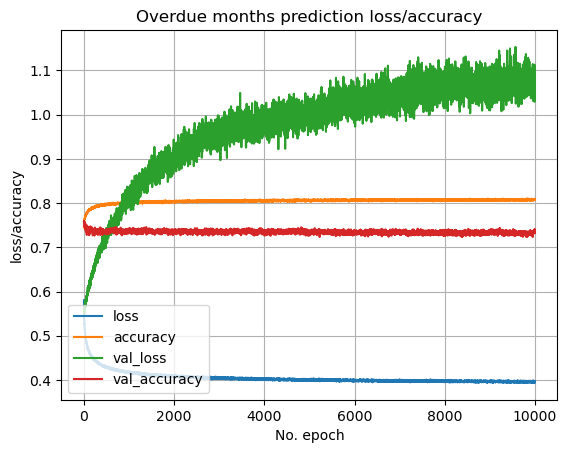

In [9]:
plt.plot(history_status.history['loss'], label='loss')
plt.plot(history_status.history['accuracy'], label='accuracy')
plt.plot(history_status.history['val_loss'], label='val_loss')
plt.plot(history_status.history['val_accuracy'], label='val_accuracy')
plt.title('Overdue months prediction loss/accuracy')
plt.ylabel('loss/accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="lower left")
plt.grid() # add grid
plt.show()

In [10]:
model_status.save('model_months') # best model is saved to ./model_months file

INFO:tensorflow:Assets written to: model_months\assets
